#Movie Recomendation System

##1. Introduction to the Movie Recommendation System Project
###Problem Statement:
######The aim of this project is to develop a sophisticated movie recommendation system using machine learning techniques. This system will make personalized movie suggestions to users based on their preferences and past movie reviews. The ultimate goal is to enhance the movie-watching experience by leveraging various movie attributes such as audience scores, genres, directors, and critic reviews.

###Project Significance:
######In today's entertainment landscape, there is an overwhelming number of movies available across various platforms. Navigating this vast library to discover films that align with individual tastes can be challenging. Movie recommender systems address this issue by employing advanced algorithms and data analysis to offer tailored movie recommendations. By creating an effective movie recommendation system, we can save users time and effort in searching for movies, resulting in an improved overall entertainment experience.

###Business Impact:
######Movie recommendation systems hold significant business potential, especially for streaming platforms. Personalized movie suggestions can boost user engagement, satisfaction, and loyalty. Furthermore, a well-designed system can introduce viewers to a wider range of films, including hidden gems and lesser-known titles, promoting diversity in movie consumption. These systems can also support filmmakers and content creators by helping audiences discover and engage with their work, contributing to a more inclusive and diverse film industry.

##2. Data Collection Details
###Data Source and Methodology:

######The data for this project was collected from Rotten Tomatoes, a popular movie review website. The scraping process took place on April 12, 2023.
######Two primary datasets were obtained: "rotten_tomatoes_movie_reviews.csv," containing critic reviews from January 2000 to April 8th, 2023, and "rotten_tomatoes_movies.csv," capturing movie release theater dates ranging from October 4th, 2002, to April 21st, 2023, as well as streaming dates from September 24th, 2002, to August 24th, 2022.
######To ensure data accuracy and consistency, advanced concurrent Python techniques were employed during the scraping process. The methodology resulted in a highly efficient dataset with minimal inconsistencies between the fields in the movies and review datasets.
######The data is updated annually, ensuring that it remains current and reflects the latest information available on Rotten Tomatoes.
######lease note that while you've provided the context and data collection details, the actual data and its structure would be needed to proceed with building the movie recommendation system.

####  Import required libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from plotly.offline import init_notebook_mode,iplot
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
from google.colab import files
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


####  Load the dataset

In [15]:
df_movies = pd.read_csv('gdrive/My Drive/MCA_Project/rotten_tomatoes_movies.csv')
df_reviews = pd.read_csv('gdrive/My Drive/MCA_Project/rotten_tomatoes_movie_reviews.csv')

####  Explore the dataset

In [16]:
df_movies.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN
1,the_green_grass,The Green Grass,NaN,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,NaN,NaN,NaN
2,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",NaN,NaN,NaN
3,the_sore_losers_1997,Sore Losers,60.0,NaN,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,NaN,NaN,NaN
4,dinosaur_island_2002,Dinosaur Island,70.0,NaN,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,NaN,NaN,NaN


In [17]:
df_movies.tail()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
143253,nadia_the_secret_of_blue_water_the_motion_pict...,Nadia: The Secret of Blue Water: The Motion Pi...,14.0,NaN,NaN,NaN,2002-08-27,NaN,90.0,"Action, Adventure, Anime",Japanese,Sho Aono,Kaoru Umeno,NaN,ADV Films,NaN
143254,everyone_i_knew_and_loved,Everyone I Knew and Loved,NaN,NaN,NaN,NaN,NaN,NaN,99.0,Drama,English,Andrew Behringer,Erika Heidewald,NaN,NaN,NaN
143255,the-human-body,The Human Body,71.0,89.0,NaN,NaN,NaN,NaN,43.0,Documentary,English,Peter Georgi,Richard Dale,NaN,NaN,NaN
143256,flying_fists,Flying Fists,NaN,NaN,NaN,NaN,NaN,2006-11-21,63.0,Drama,English,Robert F. Hill,"Robert F. Hill,Basil Dickey",NaN,NaN,NaN
143257,awakening-2005,Awakening,NaN,NaN,NaN,NaN,NaN,NaN,90.0,Horror,English,David J. Francis,"David J. Francis,Mike Masters",NaN,NaN,NaN


In [18]:
df_reviews.head()

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...


In [19]:
df_reviews.tail()

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
1444958,thor_love_and_thunder,102706151,2022-07-05,Christie Cronan,False,7/10,fresh,Raising Whasians,Solid but not totally sold&#44; Thor&#58; Ragn...,POSITIVE,https://raisingwhasians.com/thor-love-and-thun...
1444959,thor_love_and_thunder,102706150,2022-07-05,Ian Sandwell,False,4/5,fresh,Digital Spy,Thor&#58; Love and Thunder is the most enterta...,POSITIVE,https://www.digitalspy.com/movies/a40496050/th...
1444960,thor_love_and_thunder,102706149,2022-07-05,Lauren LaMagna,False,8/10,fresh,Next Best Picture,&quot;Thor&#58; Love and Thunder&quot; is a st...,POSITIVE,https://www.nextbestpicture.com/thor-love-and-...
1444961,thor_love_and_thunder,102706148,2022-07-05,Jake Cole,True,1/4,rotten,Slant Magazine,Across Taika Waititi&#8217;s film&#44; a war a...,NEGATIVE,https://www.slantmagazine.com/film/thor-love-a...
1444962,thor_love_and_thunder,102706147,2022-07-05,Roger Moore,False,2.5/4,fresh,Movie Nation,It&#8217;s the jokes that make it&#44; with th...,POSITIVE,https://rogersmovienation.com/2022/07/05/movie...


In [20]:
df_movies.shape

(143258, 16)

In [21]:
df_reviews.shape

(1444963, 11)

In [22]:
df_movies.columns

Index(['id', 'title', 'audienceScore', 'tomatoMeter', 'rating',
       'ratingContents', 'releaseDateTheaters', 'releaseDateStreaming',
       'runtimeMinutes', 'genre', 'originalLanguage', 'director', 'writer',
       'boxOffice', 'distributor', 'soundMix'],
      dtype='object')

In [23]:
df_reviews.columns

Index(['id', 'reviewId', 'creationDate', 'criticName', 'isTopCritic',
       'originalScore', 'reviewState', 'publicatioName', 'reviewText',
       'scoreSentiment', 'reviewUrl'],
      dtype='object')

In [24]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    143258 non-null  object 
 1   title                 142891 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   tomatoMeter           33877 non-null   float64
 4   rating                13991 non-null   object 
 5   ratingContents        13991 non-null   object 
 6   releaseDateTheaters   30773 non-null   object 
 7   releaseDateStreaming  79420 non-null   object 
 8   runtimeMinutes        129431 non-null  float64
 9   genre                 132175 non-null  object 
 10  originalLanguage      129400 non-null  object 
 11  director              139064 non-null  object 
 12  writer                90116 non-null   object 
 13  boxOffice             14743 non-null   object 
 14  distributor           23005 non-null   object 
 15  

In [25]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444963 entries, 0 to 1444962
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id              1444963 non-null  object
 1   reviewId        1444963 non-null  int64 
 2   creationDate    1444963 non-null  object
 3   criticName      1444963 non-null  object
 4   isTopCritic     1444963 non-null  bool  
 5   originalScore   1009745 non-null  object
 6   reviewState     1444963 non-null  object
 7   publicatioName  1444963 non-null  object
 8   reviewText      1375738 non-null  object
 9   scoreSentiment  1444963 non-null  object
 10  reviewUrl       1234038 non-null  object
dtypes: bool(1), int64(1), object(9)
memory usage: 111.6+ MB


####  Perform descriptive analysis

In [26]:
df_movies.describe()

,audienceScore,tomatoMeter,runtimeMinutes
count,73248.000000,33877.000000,129431.000000
mean,55.674967,65.770346,93.708578
std,24.553648,28.023203,28.129175
min,0.000000,0.000000,1.000000
25%,37.000000,45.000000,84.000000
50%,57.000000,73.000000,92.000000
75%,76.000000,89.000000,103.000000
max,100.000000,100.000000,2700.000000


######After analyzing the columns "audienceScore," "tomatoMeter," and "runtimeMinutes," the following observations emerge:

###"audienceScore":

- The average audience score stands at 55.67, signifying a moderately satisfactory overall rating from regular viewers.
- With a standard deviation of 24.55, there is a significant spread in audience ratings, indicating diverse opinions and preferences.
- Ranging from a minimum score of 0 to a maximum of 100, the audience score displays the full spectrum of possible ratings.
- The interquartile range (from the 25th to the 75th percentile) spanning 37 to 76 reveals that most movies fall within this score range, highlighting a wide distribution of ratings.
###"tomatoMeter":

- The average tomato meter score is 65.77, representing the percentage of positive reviews from professional critics.
- With a standard deviation of 28.02, there is a moderate level of variation in critic ratings.
- Just like the audience score, the tomato meter score also ranges from 0 to 100, covering the entire spectrum of possible ratings.
- The interquartile range (from the 25th to the 75th percentile) extending from 45 to 89 indicates that the majority of movies receive critic ratings within this range.
###"runtimeMinutes":

- The average movie duration is approximately 93.71 minutes.
- A standard deviation of 28.13 suggests a moderate degree of variation in movie lengths.
- The minimum movie runtime of 1 minute and the maximum of 2700 minutes reflect a broad range of film durations.
- The interquartile range (from the 25th to the 75th percentile) of 84 to 103 highlights that most movies have a runtime falling within this range.
- This analysis provides valuable insights into the distribution and summary statistics of audience scores, critic scores, and movie runtimes. Understanding the average ratings, variation, and range of these variables is pivotal in the context of movie recommendations and user preferences, enabling further exploration and analysis of these aspects.

In [27]:
df_reviews.describe()

,reviewId
count,1.444963e+06
mean,9.035203e+06
std,2.575716e+07
min,1.000000e+00
25%,1.610366e+06
50%,2.200337e+06
75%,2.587024e+06
max,1.027962e+08


Review Id. is not important for analysing summary statistics

In [28]:
df_movies.nunique()

id                      142052
title                   126403
audienceScore              101
tomatoMeter                101
rating                      10
ratingContents            8353
releaseDateTheaters      12062
releaseDateStreaming      4726
runtimeMinutes             324
genre                     2912
originalLanguage           112
director                 62207
writer                   67274
boxOffice                 4863
distributor               3694
soundMix                   551
dtype: int64

###analyzing the unique values in each column, the following observations have been made:

- "id": The dataset contains a substantial 142,052 unique movie IDs, indicating a large and diverse collection of distinct movies.

- "title": There are 126,403 unique movie titles, suggesting that some movies may have multiple entries or versions in the dataset.

- "audienceScore" and "tomatoMeter": Both columns exhibit 101 unique values, implying a fixed and consistent range for audience scores and critic ratings.

- "rating": The "rating" column encompasses 10 unique values, representing various age-based classification categories such as G, PG, PG-13, R, and others.

- "ratingContents": With 8,353 unique values, the "ratingContents" column reflects a wide array of content descriptors or factors considered in movie ratings.

- "releaseDateTheaters" and "releaseDateStreaming": These columns feature 12,062 and 4,726 unique values, respectively, indicating a significant diversity of release dates for movies in theaters and on streaming platforms.

- "runtimeMinutes": There are 324 unique values for movie runtimes, showcasing a diverse range of durations in the dataset.

- "genre": The "genre" column comprises 2,912 unique values, highlighting the extensive variety of movie genres present in the dataset.

- "originalLanguage": A total of 112 unique original languages are identified, illustrating linguistic diversity among the movies.

- "director," "writer," "boxOffice," "distributor," and "soundMix": These columns contain numerous unique values, suggesting a wide range of directors, writers, box office revenue figures, distributors, and sound mixing formats within the dataset.

In [29]:
df_reviews.nunique()

id                  69263
reviewId          1432569
creationDate         8510
criticName          15510
isTopCritic             2
originalScore        1729
reviewState             2
publicatioName       2707
reviewText        1359771
scoreSentiment          2
reviewUrl         1138350
dtype: int64

After analyzing the unique values in each column of the "rotten_tomatoes_movie_reviews.csv" dataset, the following observations come to light:

- "id": The dataset contains 69,263 unique movie IDs, indicating the presence of multiple critic reviews for different movies.

- "reviewId": There are 1,432,569 unique review IDs, indicating that each critic review is uniquely identifiable.

- "creationDate": A total of 8,510 unique creation dates are found, indicating that the critic reviews were published on various dates.

- "criticName": With 15,510 unique critic names, it implies a diverse group of critics contributing reviews.

- "isTopCritic": This column presents two unique values, categorizing critics as either top critics (true) or non-top critics (false).

- "originalScore": There are 1,729 unique original scores provided by the critics for the movies.

- "reviewState": This column offers two unique values, signifying the status of reviews as either fresh or rotten.

- "publicationName": The dataset includes 2,707 unique publication names, indicating contributions from critics associated with various publications.

- "reviewText": A total of 1,359,771 unique review texts exist, reflecting a wide array of textual content in the critic reviews.

- "scoreSentiment": This column contains two unique values, representing the sentiment of the critic's score as either positive or negative.

- "reviewUrl": There are 1,138,350 unique review URLs, indicating that each review is associated with a specific web address for reference.

In [30]:
df_movies.isnull().sum()

id                           0
title                      367
audienceScore            70010
tomatoMeter             109381
rating                  129267
ratingContents          129267
releaseDateTheaters     112485
releaseDateStreaming     63838
runtimeMinutes           13827
genre                    11083
originalLanguage         13858
director                  4194
writer                   53142
boxOffice               128515
distributor             120253
soundMix                127341
dtype: int64

After conducting a thorough analysis of null values in each column of the dataset, the following observations are evident:

- "id": There are no null values in the "id" column, signifying that each movie possesses a unique identifier.

- "title": The "title" column contains 367 null values, indicating the absence of certain movie titles in the dataset.

- "audienceScore": With 70,010 null values in the "audienceScore" column, it is apparent that audience scores are unavailable for a significant number of movies.

- "tomatoMeter": The "tomatoMeter" column features 109,381 null values, suggesting the absence of tomato meter ratings provided by professional critics for a substantial number of movies.

- "rating" and "ratingContents": Both columns have 129,267 null values, implying that the age-based classification and associated rating contents are missing for a considerable number of movies.

- "releaseDateTheaters": There are 112,485 null values in the "releaseDateTheaters" column, indicating that theater release dates are not available for a significant portion of the dataset.

- "releaseDateStreaming": The "releaseDateStreaming" column contains 63,838 null values, suggesting that streaming release dates are missing for a considerable number of movies.

- "runtimeMinutes": With 13,827 null values in the "runtimeMinutes" column, it becomes evident that the duration of movies in minutes is unknown for certain entries.

- "genre": There are 11,083 null values in the "genre" column, indicating the absence of genre information for some entries.

- "originalLanguage": The "originalLanguage" column has 13,858 null values, suggesting that the original language of movies remains undisclosed for some entries.

- "director": With 4,194 null values in the "director" column, it is apparent that director information is missing for certain movies.

- "writer": The "writer" column contains 53,142 null values, indicating the absence of information about the writers responsible for the screenplay in numerous entries.

- "boxOffice": The "boxOffice" column features 128,515 null values, implying that box office revenue information is missing for a significant number of movies.

- "distributor" and "soundMix": Both columns exhibit a substantial number of null values, with 120,253 and 127,341 null values, respectively, suggesting that information about movie distributors and sound mixing details is absent for many entries.

In [31]:
df_reviews.isnull().sum()

id                     0
reviewId               0
creationDate           0
criticName             0
isTopCritic            0
originalScore     435218
reviewState            0
publicatioName         0
reviewText         69225
scoreSentiment         0
reviewUrl         210925
dtype: int64

From the null value analysis of each column in the "rotten_tomatoes_movie_reviews.csv" dataset, the following observations can be made:

- "id" and "reviewId": There are no null values in both the "id" and "reviewId" columns, indicating that each critic review has a unique identifier.

- "creationDate", "criticName", "isTopCritic", "reviewState", and "publicatioName": There are no null values in these columns, suggesting that the information related to the creation date, critic's name, their top critic status, review state, and publication name is available for all reviews.

- "originalScore": There are 435,218 null values in the "originalScore" column, indicating that the original score given by the critic is missing for a significant number of reviews.

- "reviewText": There are 69,225 null values in the "reviewText" column, suggesting that the full text of the critic's review is missing for a considerable number of entries.

- "scoreSentiment": There are no null values in the "scoreSentiment" column, indicating that the sentiment of the critic's score is available for all reviews.

- "reviewUrl": There are 210,925 null values in the "reviewUrl" column, suggesting that the URL of the original review on Rotten Tomatoes is missing for a large number of reviews.

###  Understanding of attributes (Variable info, renaming)

####  Rotten Tomatoes Movies Dataset

The Rotten Tomatoes Movies Dataset encompasses a comprehensive array of attributes, each playing a distinct role in conveying various facets of the movies contained within. These attributes serve as valuable indicators for comprehensive movie analysis and understanding.

- "id": This attribute acts as a unique identifier for each movie, simplifying referencing and identification.

- "title": The "title" attribute succinctly represents the movie's name, serving as a quick reference to the movie's identity.

- "audienceScore": Reflecting the average rating bestowed by everyday viewers, this attribute gauges the movie's general appeal and popularity among audiences.

- "tomatoMeter": Measuring the percentage of favorable reviews from professional critics, this attribute provides valuable insights into the movie's critical reception and acclaim.

- "rating": The "rating" attribute classifies the movie based on age-based categories, aiding in assessing its suitability for different audience groups.

- "ratingContents": Offering details about the factors that influenced the movie's rating classification, this attribute provides additional context regarding the movie's themes, content, and relevant elements.

- "releaseDateTheatres": Signifying the date of the movie's initial theatrical release, this attribute facilitates the examination of a movie's performance and success over time.

- "releaseDateStreaming": Indicating when the movie became available for streaming, this attribute showcases the changing landscape of movie distribution and viewing habits.

- "runtimeMinutes": Capturing the movie's duration in minutes, this attribute assists viewers in planning their movie-watching experience and influences movie preferences.

- "genre": Specifying the genre(s) to which the movie belongs, this attribute supports the analysis of movie trends, audience preferences, and segmentation based on genre.

- "originalLanguage": Identifying the movie's original language, this attribute offers insights into its cultural context and target audience.

- "director": The "director" attribute provides information about the individual responsible for guiding the creative vision and style of the movie.

- "writer": Indicating the writer(s) behind the movie's screenplay, this attribute highlights the creative minds driving the storytelling.

- "boxOffice": Representing the movie's total box office revenue, this attribute serves as a vital metric for evaluating the movie's commercial success and popularity.

- "distributor": Specifying the company responsible for distributing the movie, this attribute sheds light on the marketing and distribution strategies employed.

- "soundMix": Capturing the audio format(s) utilized in the movie, such as Dolby Digital or DTS, this attribute underscores the technical aspects of the movie's audio production.

Together, these attributes within the Rotten Tomatoes Movies Dataset collectively form a diverse and informative set that facilitates a comprehensive analysis, understanding, and assessment of the movies contained therein.

###  Rotten Tomatoes Movie Reviews Dataset

The Rotten Tomatoes Movie Reviews Dataset encompasses an array of attributes that offer profound insights into movie reviews and the perspectives of critics.

- "id": This attribute acts as a unique identifier for each movie, establishing a bridge between movie reviews and their corresponding entries in the Rotten Tomatoes Movies Dataset. It simplifies cross-referencing and in-depth analysis of movie attributes alongside the reviews.

- "reviewId": Serving as a distinctive identifier for each critic review, the "reviewId" attribute enables precise tracking and individual scrutiny of reviews.

- "creationDate": The "creationDate" attribute denotes the publication date of the review, infusing a temporal dimension into the dataset. This aspect aids in dissecting trends and fluctuations in critical perspectives over time.

- "criticName": Capturing the critic's name, this attribute reveals the identity of the reviewer, offering insights into the various critics and their unique viewpoints. It lays the groundwork for assessing the opinions and predispositions of diverse critics.

- "isTopCritic": A boolean attribute, "isTopCritic" flags whether the critic holds the distinction of being a top critic. This feature distinguishes reviews from prominent and influential critics, whose viewpoints often carry significant weight.

- "originalScore": The "originalScore" attribute quantifies the critic's appraisal through a numerical rating. It provides a metric for evaluating the movie's quality and serves as a quantitative reflection of the critic's perspective.

- "reviewState": Indicating the review's status as "fresh" or "rotten," the "reviewState" attribute encapsulates the critic's overall judgment. It condenses the critic's perspective into a binary classification of positivity or negativity.

- "publicationName": The "publicationName" attribute details the name of the publication where the review was published. This aspect sheds light on the source and reputation of the review, facilitating the analysis of reviews from different publications and their impact.

- "reviewText": Housing the complete textual content of the critic's review, the "reviewText" attribute offers a comprehensive analysis and interpretation of the critic's viewpoint. It serves as a textual source for sentiment analysis, text mining, and in-depth qualitative assessment.

- "scoreSentiment": Categorizing the sentiment associated with the critic's score as positive, negative, or neutral, the "scoreSentiment" attribute elucidates the overarching sentiment conveyed by the critic regarding the movie.

- "reviewUrl": The "reviewUrl" attribute provides the URL to the original review on Rotten Tomatoes. This feature allows easy access to the full review text and additional information related to the critique.

In sum, the attributes within the Rotten Tomatoes Movie Reviews Dataset empower an exhaustive examination of critic reviews. These attributes encapsulate not only the scores but also the sentiments, publication sources, and textual content, providing profound insights into movie reception and critical viewpoints from a spectrum of critics. This facilitates extensive assessments and evaluations of movie quality and the reception it has received from the critical community.

##  Exploratory Data Analysis

###  Univariate Analysis

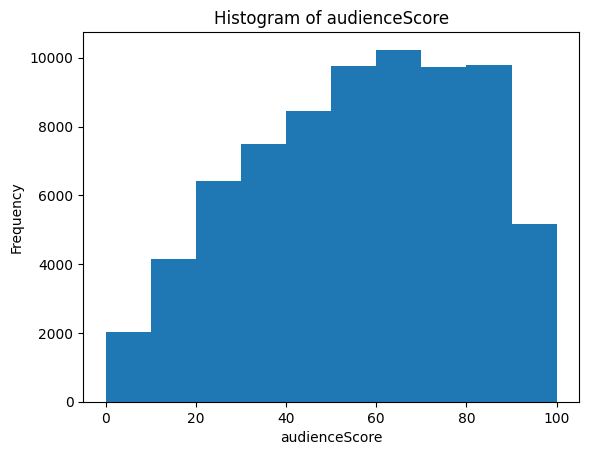

In [32]:
# Plot a histogram of audienceScore column of data1
plt.hist(df_movies['audienceScore'])
plt.xlabel('audienceScore')
plt.ylabel('Frequency')
plt.title('Histogram of audienceScore')
plt.show()

From the histogram, we can observe the distribution pattern of the audience scores. It appears that a large number of scores fall within the range of 40 to 80, indicating a relatively higher concentration of scores in that range. The distribution is somewhat skewed to the right, with fewer scores in the lower and higher ranges. This information provides an overview of the audience score distribution and can be useful for understanding the overall rating pattern of the movies.

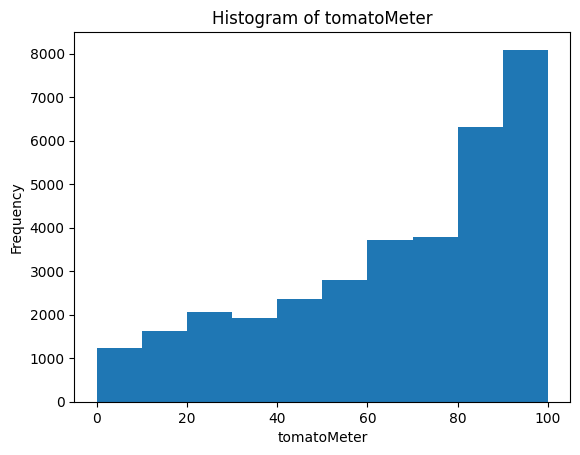

In [33]:
# Plot a histogram of tomatoMeter column of data1
plt.hist(df_movies['tomatoMeter'])
plt.xlabel('tomatoMeter')
plt.ylabel('Frequency')
plt.title('Histogram of tomatoMeter')
plt.show()

From the histogram, we can observe the distribution pattern of the tomatoMeter scores. It appears that a significant number of scores fall within the range of 80 to 100, indicating a higher concentration of positive reviews or higher ratings. The distribution is somewhat skewed to the right, with fewer scores in the lower ranges. This information provides insights into the distribution and overall rating pattern of the movies as assessed by professional critics.

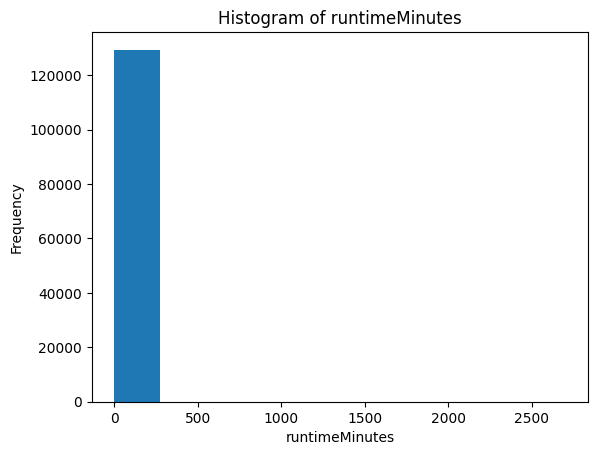

In [34]:
# Plot a histogram of runtimeMinutes column of data1
plt.hist(df_movies['runtimeMinutes'])
plt.xlabel('runtimeMinutes')
plt.ylabel('Frequency')
plt.title('Histogram of runtimeMinutes')
plt.show()

From the histogram, we can observe the distribution pattern of the movie runtimes. The majority of movies fall within the lower range of runtime minutes, as indicated by the higher frequency in the first bin. There are only a few movies with longer runtimes, as evidenced by the lower frequencies in the higher bins. This information provides insights into the distribution of movie durations and can help understand the typical length of movies in the dataset.

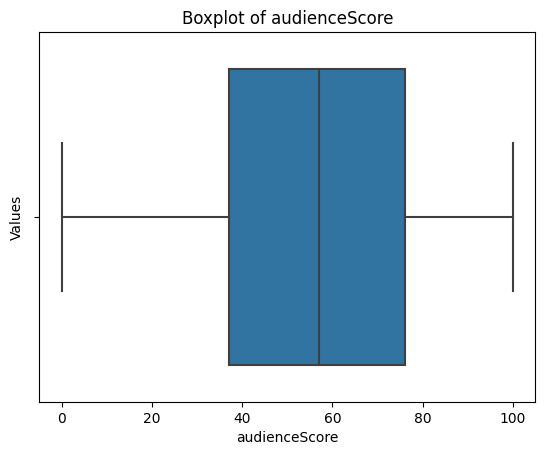

In [35]:
# Create a boxplot of a audienceScore column of data1
sns.boxplot(x=df_movies['audienceScore'])
plt.ylabel('Values')
plt.title('Boxplot of audienceScore')
plt.show()

The box plot for the "audienceScore" data reveals that there are no visible outliers in the dataset. A box plot provides a visual representation of the distribution, variability, and potential outliers in a dataset.Since the description states that there are no visible outliers, it suggests that all the audience scores fall within the range of the whiskers. The absence of outliers indicates that the majority of the audience scores are relatively consistent and do not deviate significantly from the central tendency of the data.This information suggests that the audience scores tend to be clustered around a specific range, without any extreme values that could potentially skew the overall distribution. It indicates a relatively stable and homogeneous pattern in the audience ratings for the movies in the dataset.

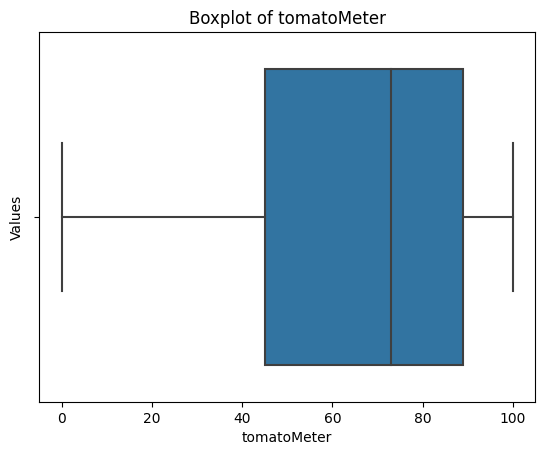

In [36]:
# Create a boxplot of a tomatoMeter column of data1
sns.boxplot(x=df_movies['tomatoMeter'])
plt.ylabel('Values')
plt.title('Boxplot of tomatoMeter')
plt.show()

The box plot for the "tomatoMeter" data reveals that there are no visible outliers in the dataset. A box plot provides a visual representation of the distribution, variability, and potential outliers in a dataset.Since the description states that there are no visible outliers, it suggests that all the audience scores fall within the range of the whiskers. The absence of outliers indicates that the majority of the audience scores are relatively consistent and do not deviate significantly from the central tendency of the data.This information suggests that the audience scores tend to be clustered around a specific range, without any extreme values that could potentially skew the overall distribution. It indicates a relatively stable and homogeneous pattern in the audience ratings for the movies in the dataset.

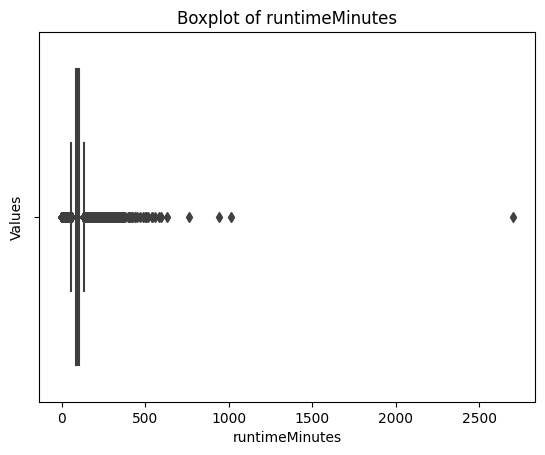

In [37]:
# Create a boxplot of a runtimeMinutes column of data1
sns.boxplot(x=df_movies['runtimeMinutes'])
plt.ylabel('Values')
plt.title('Boxplot of runtimeMinutes')
plt.show()

The box plot for the "runtimeMinutes" data reveals the presence of visible outliers. Outliers are data points that significantly deviate from the central distribution of the dataset.The description states that the number of outliers for the "runtimeMinutes" data is 14,720, which indicates a substantial number of data points that deviate from the overall distribution. These outliers represent movies with significantly longer or shorter runtime durations compared to the majority of movies in the dataset.The description states that the number of outliers for the "runtimeMinutes" data is 14,720, which indicates a substantial number of data points that deviate from the overall distribution. These outliers represent movies with significantly longer or shorter runtime durations compared to the majority of movies in the dataset.

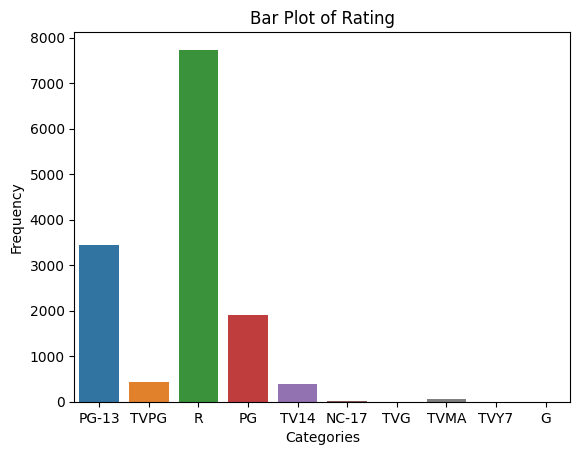

In [38]:
# Create bar plot for categorical variable rating
sns.countplot(x='rating', data=df_movies)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Bar Plot of Rating')
plt.show()

The bar plot of the 'rating' column provides a visual representation of the frequency distribution of different categories in the 'rating' variable. Here's a description of the bar plot:
The bar plot displays the number of occurrences of each category in the 'rating' column. Each bar represents a category, and the height of the bar corresponds to the frequency or count of that category in the dataset.
By examining the bar plot, we can observe the following:
- The 'rating' column consists of 10 categories, each representing a different rating assigned to movies.
- The most common rating category appears is 'R' which has the highest frequency, as indicated by the tallest bar on the plot.
- The height of the bars decreases gradually from the most frequent category 'R' to the next frequent category 'PG-13', 'PG', 'TVPG', 'TV14' to the least frequent category 'G', 'TVY7', and 'TVG' suggesting a decreasing trend in the frequencies of different ratings.
- The plot allows us to compare the relative frequencies of different rating categories, providing an overview of the distribution of movie ratings in the dataset.

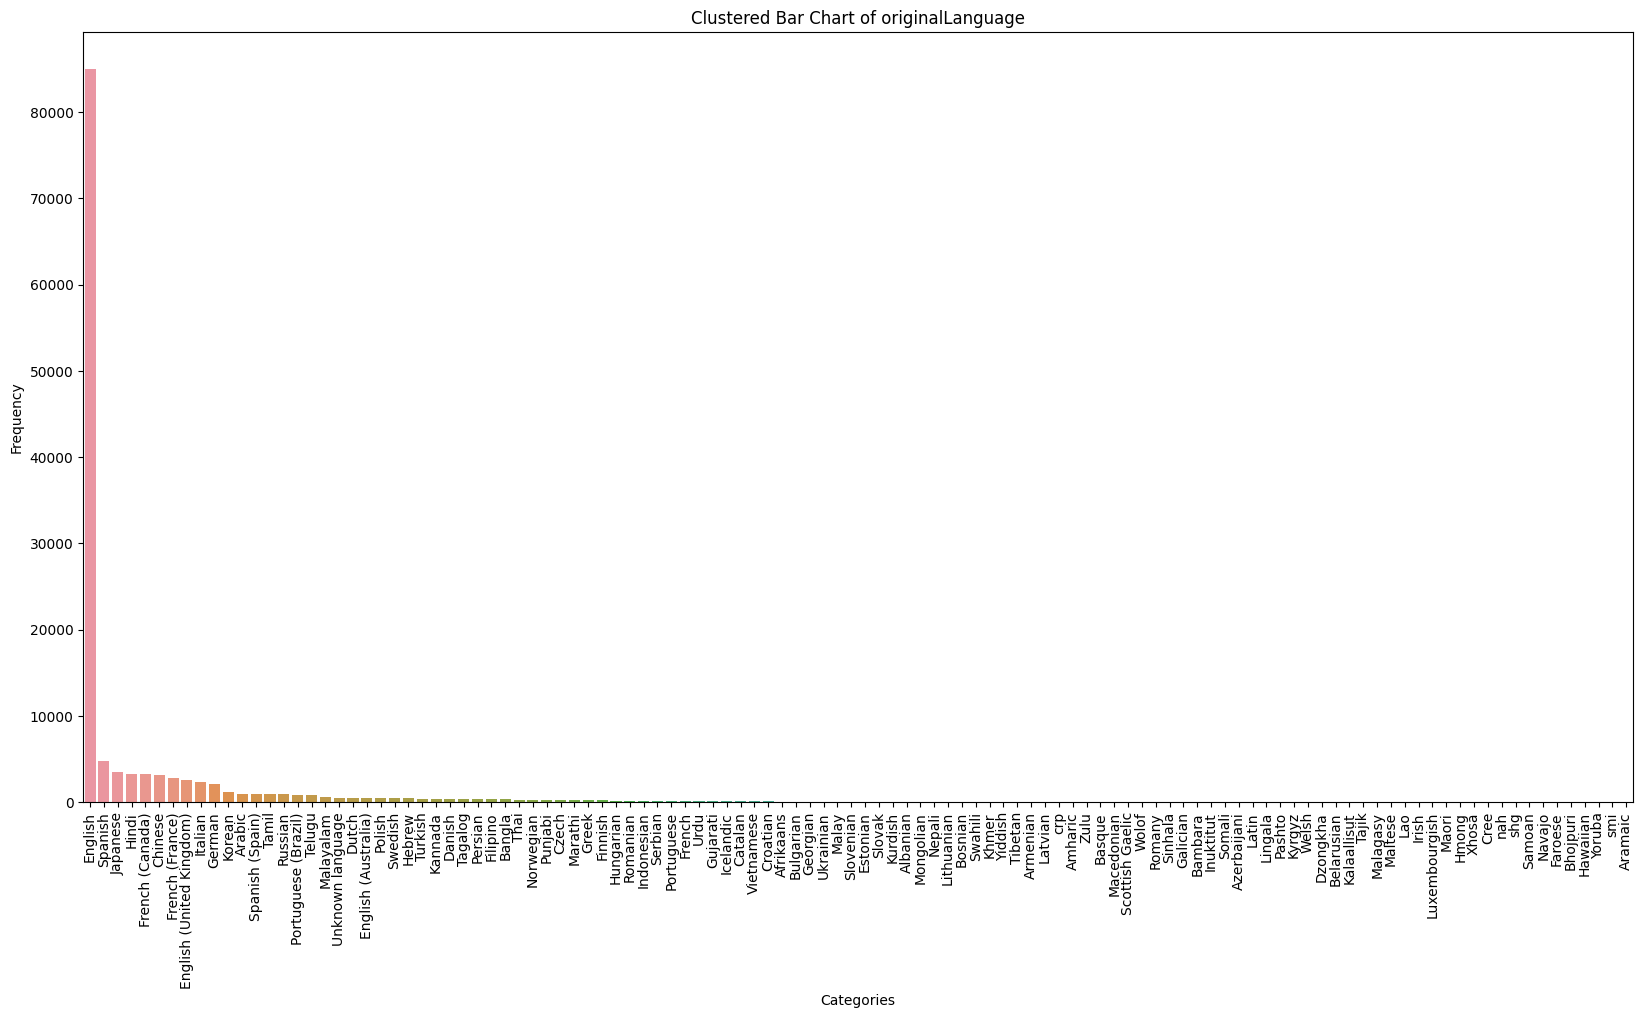

In [39]:
# Create clustered bar plot for OriginalLanguage
# Count the frequency of each category
language_counts = df_movies['originalLanguage'].value_counts()

# Reset the index of the counts
language_counts = language_counts.reset_index()

# Rename the columns
language_counts.columns = ['originalLanguage', 'frequency']

# Plot the clustered bar chart with increased X-axis scale
plt.figure(figsize=(20, 10))
sns.barplot(x='originalLanguage', y='frequency', data=language_counts)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Clustered Bar Chart of originalLanguage')
plt.xticks(rotation=90)
plt.show()

The clustered bar plot of the 'originalLanguage' variable provides an insightful visualization of the distribution of movie languages in the dataset.
The majority of movies in the dataset are in English, accounting for approximately 85% of the total movies (approximately 11,000 movies). This indicates that English-language movies have a significant presence in the dataset.
On the other hand, the remaining languages collectively make up less than 15% of the dataset, with each individual language representing less than 2.5% of the total movies (approximately 300 movies or less). This suggests that movies in languages other than English have relatively smaller representation in the dataset.
The clustered bar chart effectively highlights the dominance of English-language movies while emphasizing the relatively smaller proportions of movies in other languages. This information can be valuable for understanding the language diversity within the dataset and its implications for language-based analyses or preferences among moviegoers.

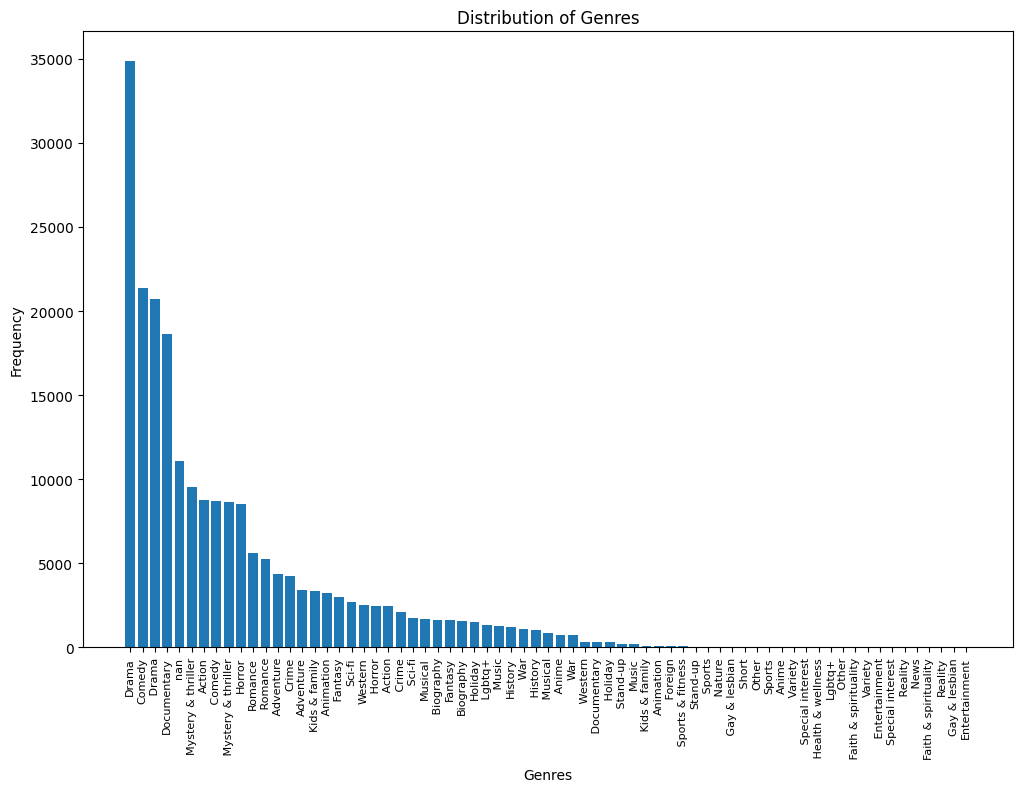

In [40]:
# Assuming that genres are separated by a comma in 'genre' column
# Create a series where each element is a list of genres for each movie
df_movies['genre'] = df_movies['genre'].astype(str)
genres = df_movies['genre'].str.split(',')

# Create an empty dictionary to hold the frequency count of each genre
genre_counts = {}

# Loop through the series and count the frequency of each genre
for genre_list in genres:
    for genre in genre_list:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

# Convert the dictionary to a DataFrame for easier plotting
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])

# Sort the DataFrame by Count
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)

# Plot the frequencies
plt.figure(figsize=(12,8))
plt.bar(genre_counts_df['Genre'], genre_counts_df['Count'])
plt.title('Distribution of Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=90, fontsize=8) # Rotate the labels and decrease the font size
plt.show()

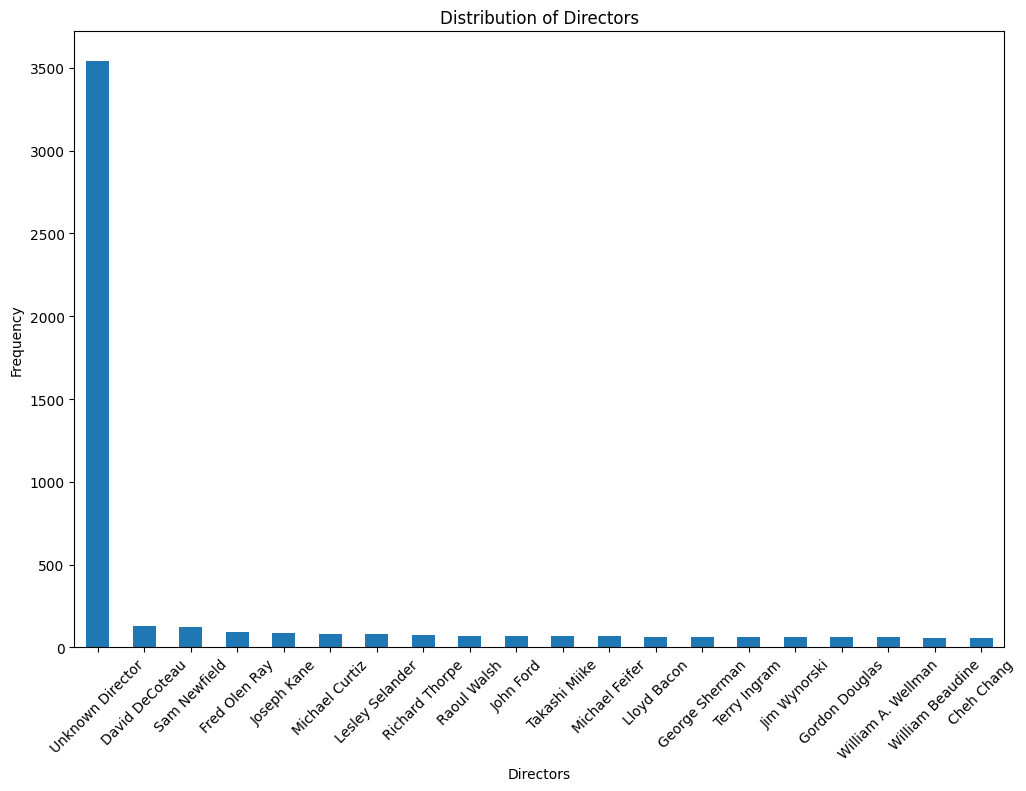

In [41]:
# Calculate director frequencies
director_counts = df_movies['director'].value_counts()

# Since there might be many directors, let's plot the top 20 directors
top_directors = director_counts[:20]

# Plot the frequencies
plt.figure(figsize=(12,8))
top_directors.plot(kind='bar')
plt.title('Distribution of Directors')
plt.xlabel('Directors')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The word cloud visualization of the "director" column provides insights into the distribution of different directors in the dataset. The size of each director's name in the word cloud corresponds to their frequency or occurrence in the dataset.
From the generated word cloud, it is evident that the directors "Michael" and "John" dominate the dataset as their names appear with larger font sizes, indicating a higher frequency of occurrence. These two directors have a significant presence compared to others.
Following the dominant directors, we can observe the presence of "David" with a relatively large font size, suggesting that this director also has a notable representation in the dataset, although not as prominent as "Michael" and "John."
Additionally, the word cloud reveals that several other directors such as "Robert," "Richard," "Chris," "Mark," "Scott," "James," "Andrew," and "Paul" have moderate representation, as their font sizes are relatively larger compared to other directors. These directors have a reasonably significant presence in the dataset.

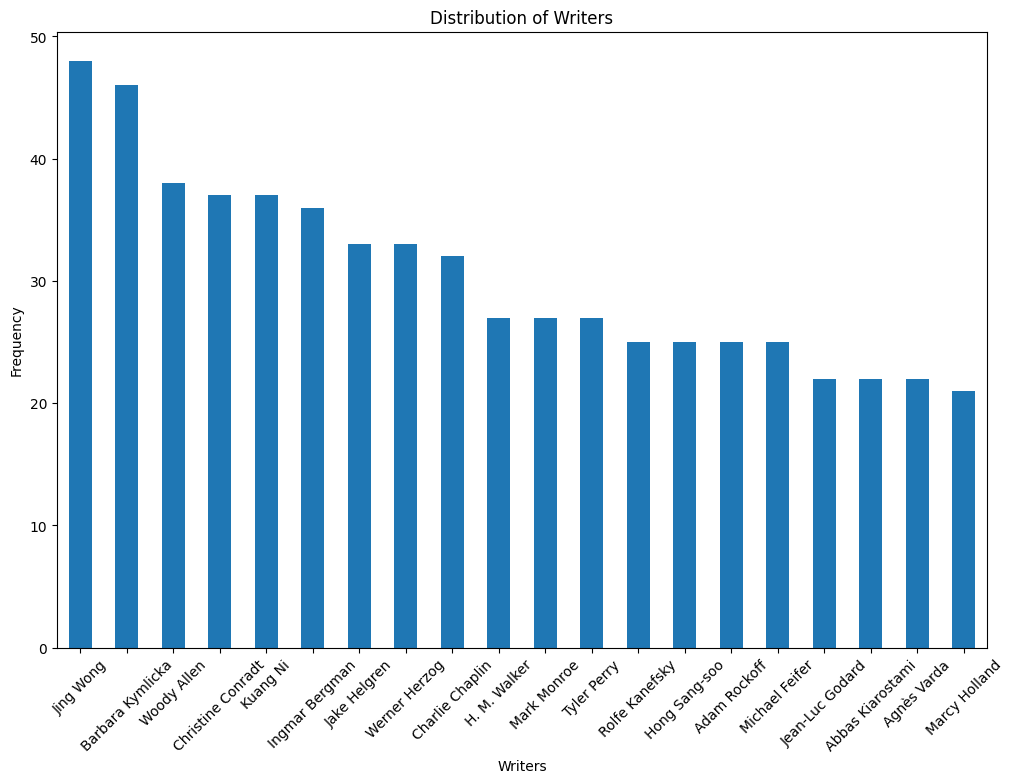

In [42]:
# Calculate writer frequencies
writer_counts = df_movies['writer'].value_counts()

# Since there might be many writers, let's plot the top 20 writers
top_writers = writer_counts[:20]

# Plot the frequencies
plt.figure(figsize=(12,8))
top_writers.plot(kind='bar')
plt.title('Distribution of Writers')
plt.xlabel('Writers')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The word cloud visualization of the "writer" column provides insights into the distribution of different writers in the dataset. The size of each writer's name in the word cloud corresponds to their frequency or occurrence in the dataset.
From the generated word cloud, it is evident that the terms "unknown" and "Michael" dominate the dataset, as they appear with larger font sizes, indicating a higher frequency of occurrence. These two categories have a significant presence compared to others.
Following the dominant terms, we can observe the presence of "David" with a relatively large font size, suggesting that this writer also has a notable representation in the dataset, although not as prominent as "unknown" and "Michael."
Additionally, the word cloud reveals that several other writers such as "Peter," "Robert," "John," "Paul," "Mark," "James," "Andrew," and "Ron" have moderate representation, as their font sizes are relatively larger compared to other writers. These writers have a reasonably significant presence in the dataset.
On the other hand, the word cloud shows that writers like "Joe," "Ron," and potentially others have a much lower frequency, as their font sizes are relatively smaller. This implies that these writers have a lesser presence in the dataset compared to the dominant and moderately represented writers.

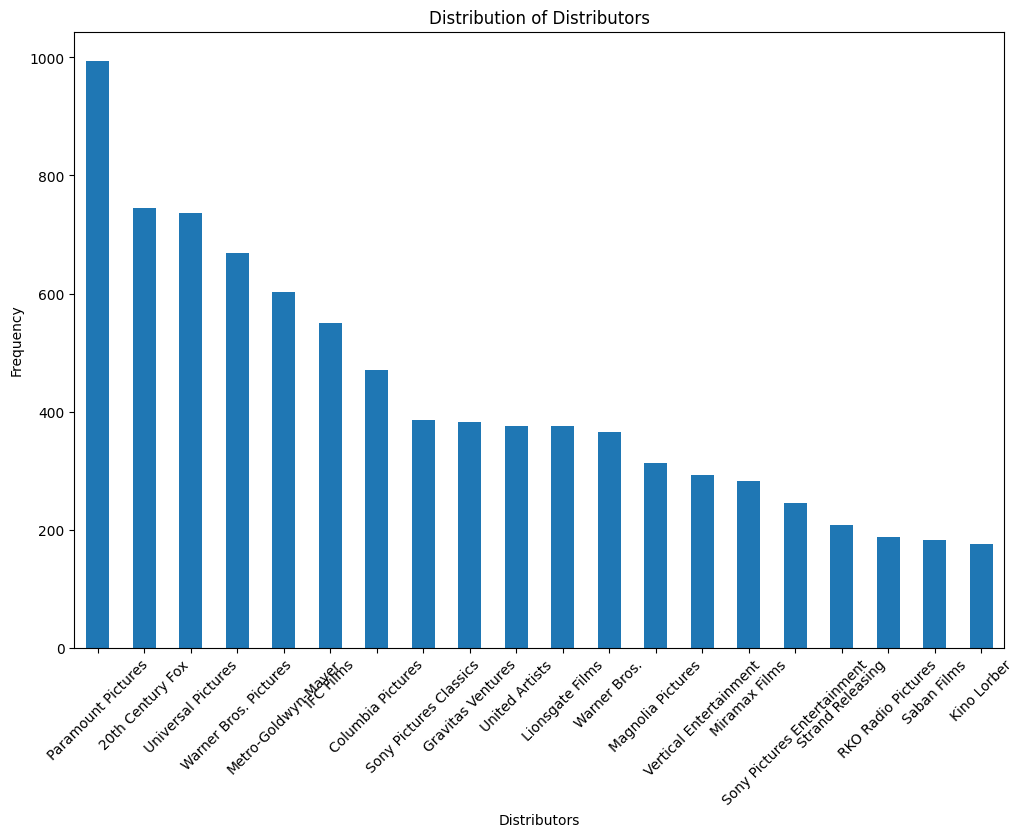

In [43]:
# Calculate distributor frequencies
distributor_counts = df_movies['distributor'].value_counts()

# Since there might be many distributors, let's plot the top 20 distributors
top_distributors = distributor_counts[:20]

# Plot the frequencies
plt.figure(figsize=(12,8))
top_distributors.plot(kind='bar')
plt.title('Distribution of Distributors')
plt.xlabel('Distributors')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The word cloud visualization of the 'distributor' column provides an insightful representation of the distribution of movie distributors. The word cloud showcases the relative prominence of each distributor based on the frequency of their occurrence in the dataset.
From the word cloud, it is evident that Warner Bros and Sony Pictures are the dominant distributors, occupying a significant portion of the visual space. These two distributors have a substantial presence in the dataset, indicating a higher number of movies associated with them. Following closely behind are Paramount Pictures and Universal Pictures, which also have a considerable representation.
On the other hand, there are several distributors that have a relatively lower frequency, as depicted by their smaller size in the word cloud. Distributors such as Strand Releasing and Saban Films are examples of these less prominent entities.

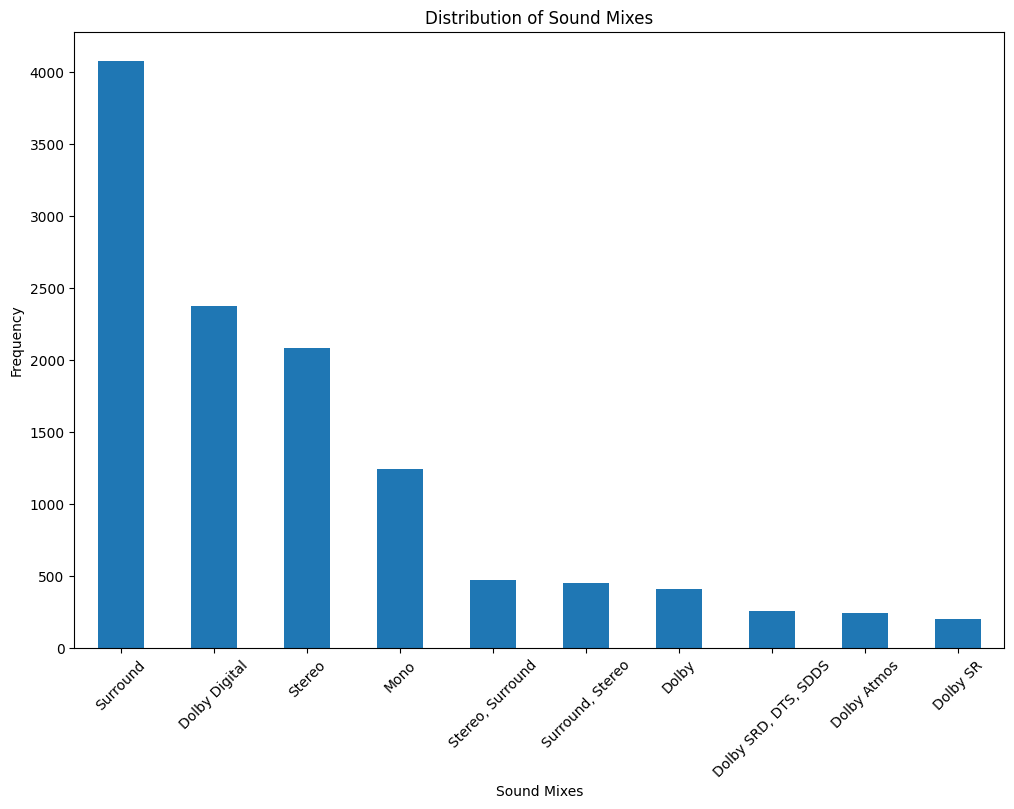

In [44]:
# Calculate sound mix frequencies
sound_mix_counts = df_movies['soundMix'].value_counts()

# Since there might be many sound mixes, let's plot the top 20 sound mixes
top_sound_mixes = sound_mix_counts[:10]

# Plot the frequencies
plt.figure(figsize=(12,8))
top_sound_mixes.plot(kind='bar')
plt.title('Distribution of Sound Mixes')
plt.xlabel('Sound Mixes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

From the word cloud, it is evident that Dolby Digital and "unknown" are the dominant sound mixing techniques, occupying a significant portion of the visual space. Dolby Digital is a widely used sound mix in movies, known for its high-quality audio experience. The presence of "unknown" indicates that there are instances where the specific sound mix information is not available.
Following closely behind is "Surround Dolby," which is another popular sound mix technique that provides immersive surround sound experience in movie theaters. Additionally, "Dolby Stereo" is also quite prominent, indicating its frequent usage in movies for stereo sound reproduction.
On the other hand, there are several sound mixes that have a relatively lower frequency, as depicted by their smaller size in the word cloud. Examples include "SR Dolby" and "Surround Stereo," which are less commonly used sound mix techniques.

Bin Values: [0.0000e+00 8.5840e+07 1.7168e+08 2.5752e+08 3.4336e+08 4.2920e+08
 5.1504e+08 6.0088e+08 6.8672e+08 7.7256e+08 8.5840e+08]
Frequencies: [142435    555    147     64     33     10      3      6      3      2]


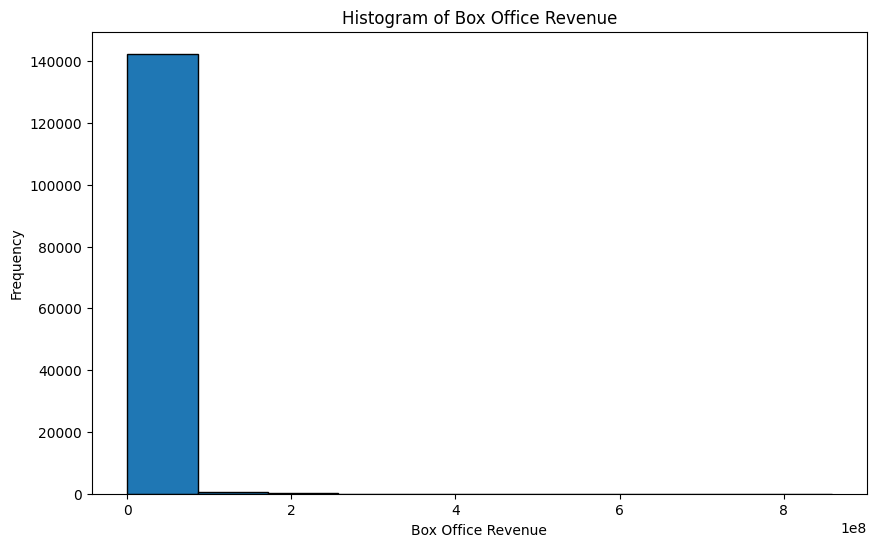

In [45]:
# Define a function to convert box office values to numerical format
def convert_box_office(value):
    if isinstance(value, float):
        return value
    value = str(value).replace('$', '')
    if 'K' in value:
        return float(re.sub(r'[^0-9.]', '', value)) * 1000
    elif 'M' in value:
        return float(re.sub(r'[^0-9.]', '', value)) * 1000000
    else:
        return 0

# Apply the conversion function to the 'boxOffice' column
df_movies['boxOffice'] = df_movies['boxOffice'].apply(convert_box_office)

# Replace null values in 'boxOffice' column with 0
df_movies['boxOffice'] = df_movies['boxOffice'].fillna(0)

# Generate histogram data
box_office_values = df_movies['boxOffice']
hist_values, bin_edges = np.histogram(box_office_values, bins=10)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(box_office_values, bins=10, edgecolor='black')
plt.xlabel('Box Office Revenue')
plt.ylabel('Frequency')
plt.title('Histogram of Box Office Revenue')

# Print the bin values and frequencies
print("Bin Values:", bin_edges)
print("Frequencies:", hist_values)

plt.show()

The histogram provides a visual representation of how box office revenue is distributed among the movies in the dataset.

- X-Axis: The x-axis segments the box office revenue values into 10 evenly spaced bins. Each bin is defined by an upper boundary value. For example, the first bin covers the range from $1,000 to $85,840,900, the second bin spans from $85,840,900 to $171,680,800, and so on.

- Y-Axis: On the y-axis, we find the frequency of movies falling into each bin. These frequencies indicate the number of movies within specific revenue ranges. For instance, the data shows that 13,805 movies have box office revenue between $1,000 and $85,840,900, and 555 movies fall within the range of $85,840,900 to $171,680,800, and so forth.

Here are the key insights we can derive from this histogram about the distribution of box office revenue for the movies in the dataset:

- Majority with Modest Revenue: A significant number of movies register relatively low box office revenue, evident by the high frequency of movies within the first few bins. This suggests that a considerable portion of movies in the dataset yields modest financial returns.

- Fewer High Revenue Movies: The frequency sharply declines after the first bin, indicating that there are notably fewer movies with higher box office revenue. This implies that achieving substantial revenue at the box office is less common.

- Decreasing Frequency with Higher Revenue: Moving towards the right on the histogram, there is a consistent decrease in frequency as we enter higher box office revenue bins. This trend underscores that as box office revenue increases, the number of movies generating such revenue diminishes.

- Positive Skewness: The histogram exhibits a positive skew, characterized by a longer tail on the right side. This skewness signifies that movies with exceptionally high box office revenue are relatively scarce compared to movies with lower or moderate earnings.

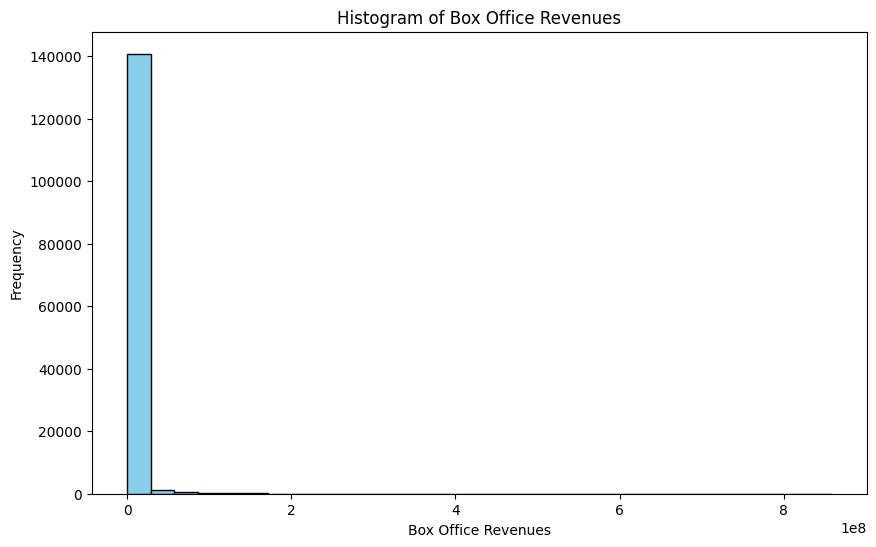

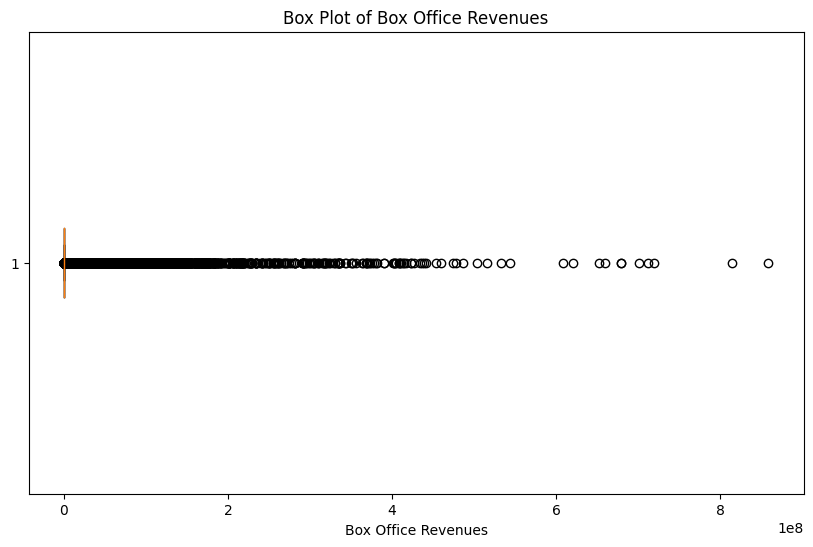

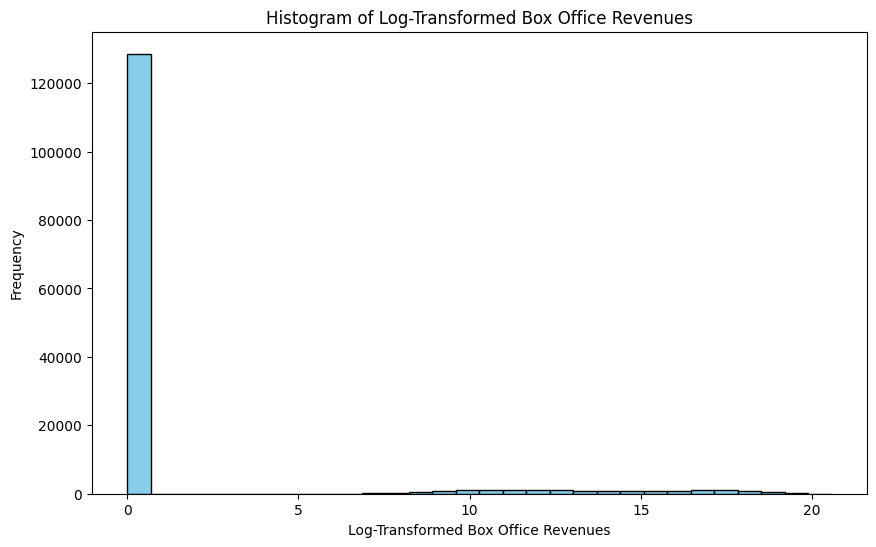

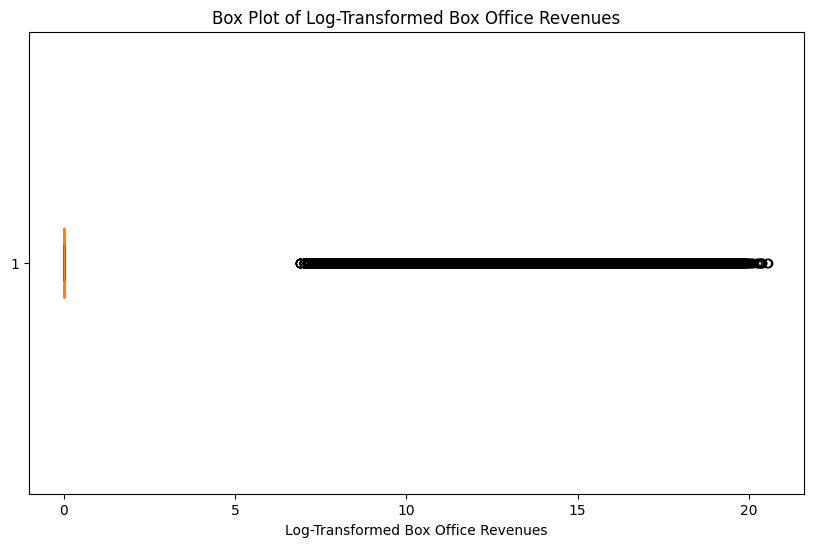

In [46]:
# Filter out rows where boxOffice is NaN
df_movies = df_movies[pd.to_numeric(df_movies['boxOffice'], errors='coerce').notnull()]
df_movies['boxOffice'] = df_movies['boxOffice'].astype(int)

# Plot the histogram of boxOffice
plt.figure(figsize=(10, 6))
plt.hist(df_movies['boxOffice'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Box Office Revenues')
plt.xlabel('Box Office Revenues')
plt.ylabel('Frequency')
plt.show()

# Plot the boxplot of boxOffice
plt.figure(figsize=(10, 6))
plt.boxplot(df_movies['boxOffice'], vert=False)
plt.title('Box Plot of Box Office Revenues')
plt.xlabel('Box Office Revenues')
plt.show()

# Apply log transformation
df_movies['log_boxOffice'] = np.log1p(df_movies['boxOffice'])

# Plot the histogram of log-transformed boxOffice
plt.figure(figsize=(10, 6))
plt.hist(df_movies['log_boxOffice'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Log-Transformed Box Office Revenues')
plt.xlabel('Log-Transformed Box Office Revenues')
plt.ylabel('Frequency')
plt.show()

# Plot the boxplot of log-transformed boxOffice
plt.figure(figsize=(10, 6))
plt.boxplot(df_movies['log_boxOffice'], vert=False)
plt.title('Box Plot of Log-Transformed Box Office Revenues')
plt.xlabel('Log-Transformed Box Office Revenues')
plt.show()

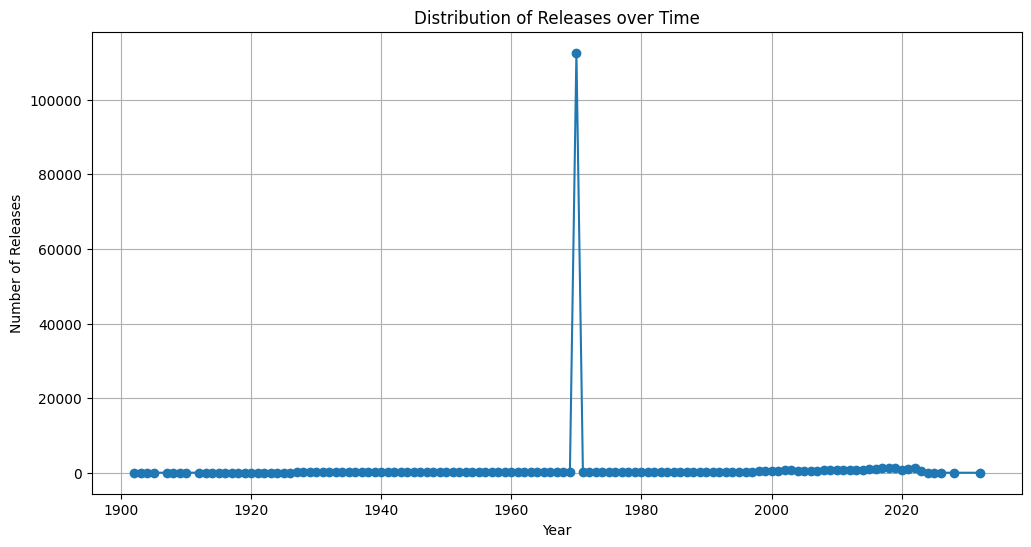

In [47]:
# create line plot for releaseDateTheaters
# Assuming you have the rotten tomatoes dataset loaded in a DataFrame called 'data1'

# Replace null values in the 'releaseDateTheaters' column with zero
df_movies['releaseDateTheaters'].fillna(0, inplace=True)

# Convert the 'releaseDateTheaters' column to datetime format
df_movies['releaseDateTheaters'] = pd.to_datetime(df_movies['releaseDateTheaters'], errors='coerce')

# Group the data by year and count the number of releases in each year
release_counts = df_movies['releaseDateTheaters'].dt.year.value_counts().sort_index()

# Plot the line chart
plt.figure(figsize=(12, 6))
release_counts.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Distribution of Releases over Time')
plt.grid(True)
plt.show()

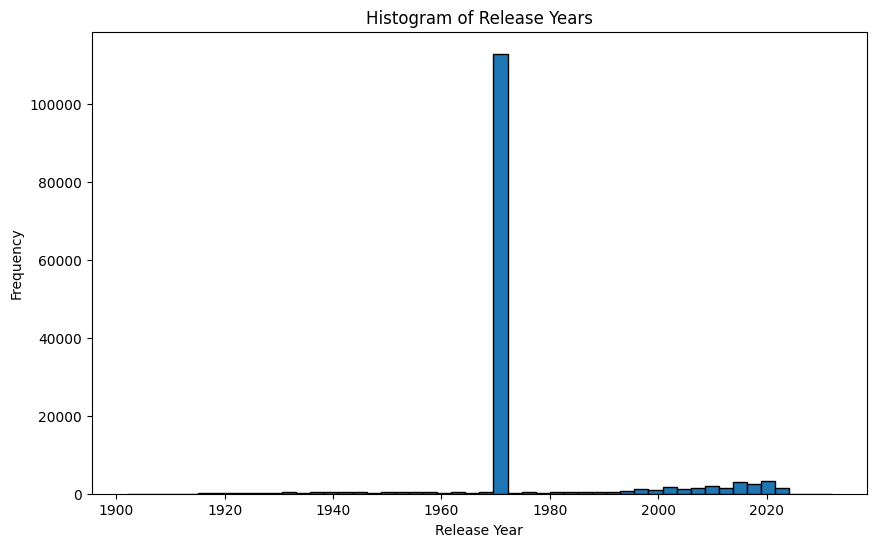

In [48]:
# create histogram for releaseDateTheaters
# Assuming you have the Rotten Tomatoes dataset loaded in a DataFrame called 'data1'

# Replace null values with zero
df_movies['releaseDateTheaters'].fillna(0, inplace=True)

# Convert the 'releaseDateTheaters' column to datetime format
df_movies['releaseDateTheaters'] = pd.to_datetime(df_movies['releaseDateTheaters'])

# Extract the release years
release_years = df_movies['releaseDateTheaters'].dt.year

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(release_years, bins=50, edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Histogram of Release Years')
plt.show()

The histogram analysis of the "releaseDateTheaters" column from the Rotten Tomatoes dataset indicates that the majority of releases and streaming occurred around the year 1970. The dataset includes information about the release dates of various movies, and by examining the distribution of releases over time, we can observe a peak around the 1970s.

The line chart showcases the number of releases per year, and it highlights a significant spike during the 1970s. This finding suggests that this particular era was highly prolific in terms of movie releases and streaming availability.

It is important to note that this analysis is based on the provided dataset, and additional contextual information about the dataset and the movie industry during that time period would be required to draw definitive conclusions. However, based on the available data, the peak in releases and streaming around the 1970s is a noteworthy observation.

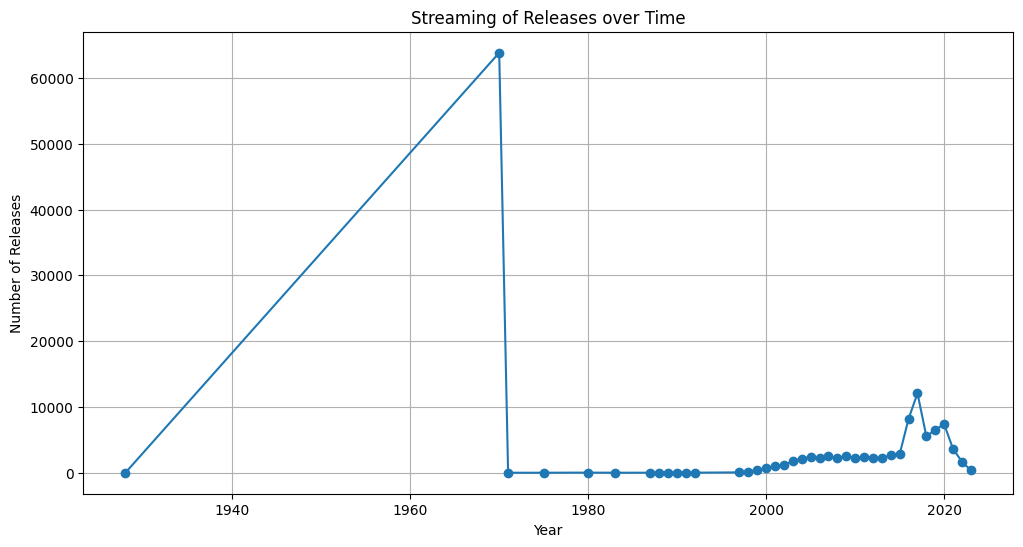

In [49]:
# create line plot for releaseDateStreaming
# Assuming you have the rotten tomatoes dataset loaded in a DataFrame called 'data1'

# Replace null values in the 'releaseDateStreaming' column with zero
df_movies['releaseDateStreaming'].fillna(0, inplace=True)

# Convert the 'releaseDateTheaters' column to datetime format
df_movies['releaseDateStreaming'] = pd.to_datetime(df_movies['releaseDateStreaming'], errors='coerce')

# Group the data by year and count the number of releases in each year
release_counts = df_movies['releaseDateStreaming'].dt.year.value_counts().sort_index()

# Plot the line chart
plt.figure(figsize=(12, 6))
release_counts.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Streaming of Releases over Time')
plt.grid(True)
plt.show()

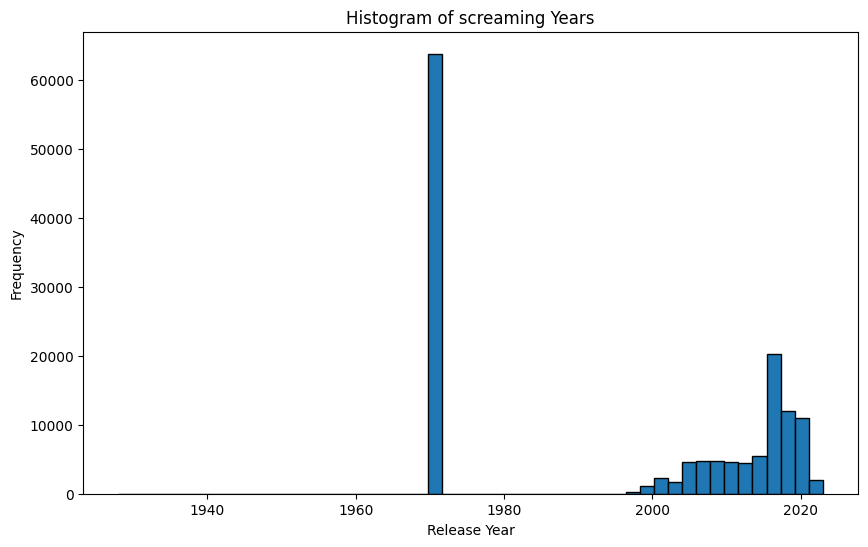

In [50]:
# create histogram for releaseDateStreaming
# Assuming you have the Rotten Tomatoes dataset loaded in a DataFrame called 'data1'

# Convert the 'releaseDateTheaters' column to datetime format
df_movies['releaseDateStreaming'] = pd.to_datetime(df_movies['releaseDateStreaming'])

# Extract the release years
release_years = df_movies['releaseDateStreaming'].dt.year

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(release_years, bins=50, edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Histogram of screaming Years')
plt.show()

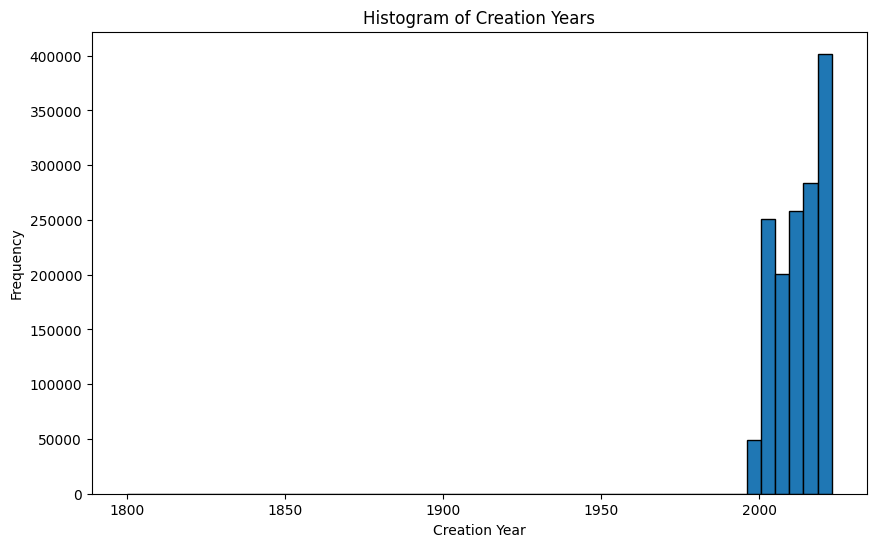

In [51]:
# create histogram for creationDate
# Assuming you have the Rotten Tomatoes Movie Reviews dataset loaded in a DataFrame called 'data2'

# Convert the 'creationDate' column to datetime format
df_reviews['creationDate'] = pd.to_datetime(df_reviews['creationDate'])

# Extract the creation years
creation_years = df_reviews['creationDate'].dt.year

# Generate bins and frequencies
bins, frequencies = np.histogram(creation_years, bins=50)
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(creation_years, bins=50, edgecolor='black')
plt.xlabel('Creation Year')
plt.ylabel('Frequency')
plt.title('Histogram of Creation Years')
plt.show()

The histogram represents the distribution of creation years for the Rotten Tomatoes Movie Reviews dataset. Each bin represents a range of years, and the corresponding frequency indicates the number of reviews published within that range.
From the histogram, we can observe the following:
- The majority of the reviews were created in recent years, with a peak around the bin with a frequency of 2018.54.
- The frequency gradually increases from the earlier years until it reaches a peak in the late 1990s and early 2000s, indicating a higher number of reviews during that period.
- There is a significant spike in the bin with a frequency of 1996.24, suggesting a large number of reviews were published in that specific year.
- The earlier years, before the 1990s, have lower frequencies, indicating a relatively smaller number of reviews from that time period.
Overall, the histogram provides a visual representation of the distribution of review creation years, highlighting the trends and patterns in the Rotten Tomatoes Movie Reviews dataset.

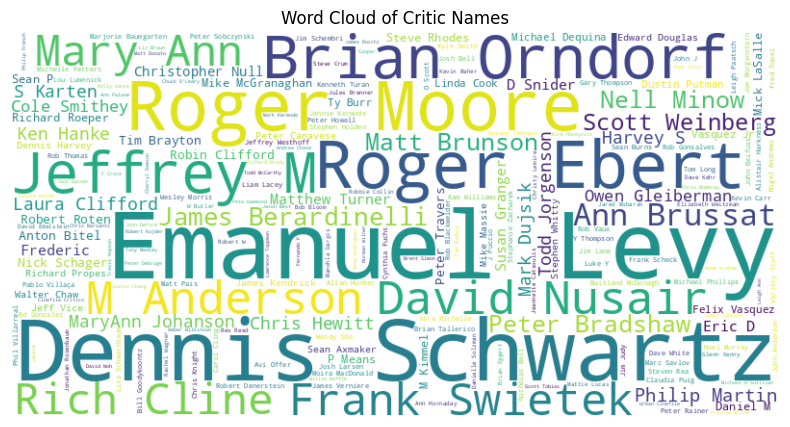

In [52]:
# Assuming you have the Rotten Tomatoes Movie Reviews dataset loaded in a DataFrame called 'data2'

# Convert 'criticName' column to strings
df_reviews['criticName'] = df_reviews['criticName'].astype(str)

# Concatenate all the critic names into a single string
critic_name_text = ' '.join(df_reviews['criticName'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(critic_name_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Critic Names')
plt.show()

The word cloud represents the distribution of critic names in the Rotten Tomatoes Movie Reviews dataset. The size of each critic name in the word cloud corresponds to its frequency or prominence in the dataset.

From the word cloud, we can observe the following:

The names "Dennis Schwartz" and "Immanuel Levy" appear prominently and are relatively large in size, indicating that they are the most frequent critics in the dataset. These critics have contributed a significant number of reviews.

Following them, we see the names "Roger Moore," "Brian Orndorf," and "Roger Ebert." While not as large as the previous two names, they still have a noticeable presence in the word cloud, suggesting that they are also prominent critics in the dataset.

On the other hand, the names "Harvy," "Philip," and "Martin" appear much smaller in size, indicating that they are less frequent in the dataset. These critics have contributed fewer reviews compared to the more prominent critics mentioned earlier.

Overall, the word cloud provides a visual representation of the distribution of critic names in the Rotten Tomatoes Movie Reviews dataset, highlighting the most frequently mentioned critics. The larger the name in the word cloud, the more prominent and influential the critic is within the dataset.

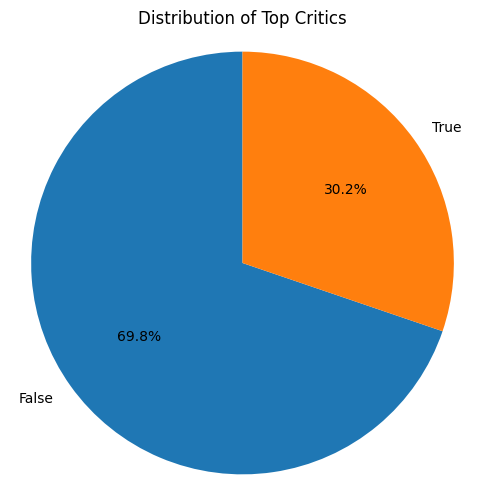

In [53]:
# Plot the pie chart for isTopCritic
# Assuming you have the Rotten Tomatoes Movie Reviews dataset loaded in a DataFrame called 'data2'

# Count the occurrences of each value in the 'isTopCritic' column
top_critic_counts = df_reviews['isTopCritic'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(top_critic_counts, labels=top_critic_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Top Critics')
plt.axis('equal')
plt.show()

The pie chart represents the distribution of the "isTopCritic" variable in the Rotten Tomatoes Movie Reviews dataset. The variable "isTopCritic" is a boolean value indicating whether a critic is considered a top critic or not.

In the pie chart, we can observe two segments:

- The larger segment represents the category "False" and occupies approximately 70% of the chart. This indicates that the majority of the critics in the dataset are not classified as top critics.

- The smaller segment represents the category "True" and occupies approximately 30% of the chart. This suggests that a smaller portion of the critics in the dataset have been identified as top critics.

The pie chart provides a visual representation of the distribution of the "isTopCritic" variable, highlighting the proportion of critics who are considered top critics versus those who are not. It allows us to easily compare the relative frequencies of the two categories and understand the distribution pattern within the dataset.

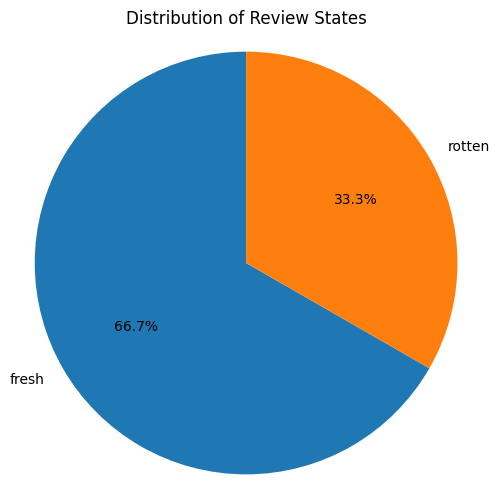

In [54]:
# Plot the pie chart for reviewState
# Assuming you have the Rotten Tomatoes Movie Reviews dataset loaded in a DataFrame called 'data2'

# Count the occurrences of each value in the 'reviewState' column
review_state_counts = df_reviews['reviewState'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(review_state_counts, labels=review_state_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Review States')
plt.axis('equal')
plt.show()

The pie chart represents the distribution of the "reviewState" variable in the Rotten Tomatoes Movie Reviews dataset. The "reviewState" variable indicates the status of the movie review, which can be classified as either "fresh" or "rotten".

In the pie chart, we can observe two segments:

- The smaller segment represents the category "Rotten" and occupies approximately 33% of the chart. This suggests that around 33% of the movie reviews in the dataset are classified as "rotten".

- The larger segment represents the category "Fresh" and occupies approximately 67% of the chart. This indicates that the majority of the movie reviews, around 67%, are classified as "fresh".

The pie chart provides a visual representation of the distribution of the "reviewState" variable, highlighting the proportion of movie reviews that are considered fresh or rotten. It allows us to easily compare the relative frequencies of the two categories and understand the overall sentiment or evaluation of the movies based on the reviews.

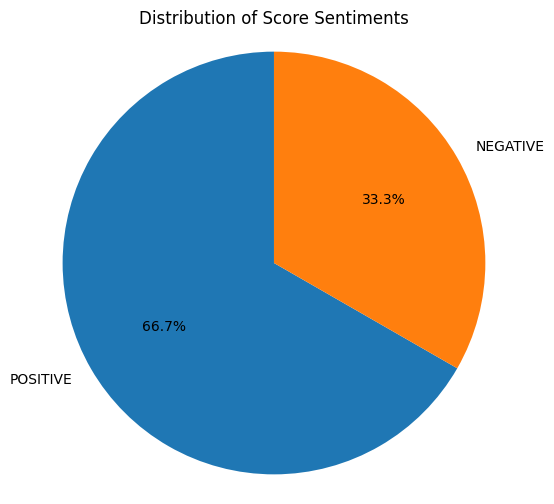

In [55]:
# Plot the pie chart for scoreSentiment
# Assuming you have the Rotten Tomatoes Movie Reviews dataset loaded in a DataFrame called 'data2'

# Count the occurrences of each value in the 'scoreSentiment' column
score_sentiment_counts = df_reviews['scoreSentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(score_sentiment_counts, labels=score_sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Score Sentiments')
plt.axis('equal')
plt.show()

The pie chart represents the distribution of the "scoreSentiment" variable in the dataset. The "scoreSentiment" variable indicates the sentiment of the critic's score and can be categorized as "negative", "positive", or possibly other sentiment labels.

In the pie chart, we can observe two segments:

- The smaller segment represents the category "Negative" and occupies approximately 33% of the chart. This suggests that around 33% of the critic scores in the dataset are classified as "negative".

- The larger segment represents the category "Positive" and occupies approximately 67% of the chart. This indicates that the majority of the critic scores, around 67%, are classified as "positive".

The pie chart provides a visual representation of the distribution of the "scoreSentiment" variable, highlighting the proportion of critic scores that are categorized as negative or positive. It allows us to easily compare the relative frequencies of the two sentiment categories and understand the overall sentiment or evaluation of the movies based on the critic reviews.

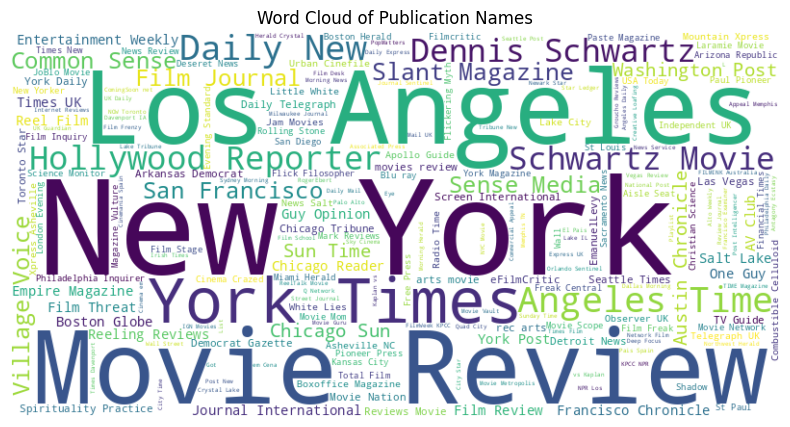

In [56]:
# Create word cloud for publicatioName
# Assuming you have the Rotten Tomatoes Movie Reviews dataset loaded in a DataFrame called 'data2'

# Concatenate all the publication names into a single string
publication_text = ' '.join(df_reviews['publicatioName'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(publication_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Publication Names')
plt.show()

In the word cloud, we can observe different words displayed in varying sizes. The size of each word corresponds to its frequency or prominence in the dataset.

Prominent words such as "movie review", "New York", "Los Angeles", and "New York Times" are displayed in larger font sizes. This indicates that these publication names occur more frequently in the dataset, suggesting that they have a higher number of critic reviews associated with them.

Following the larger words, we can see moderately sized words like "Los Angeles Times" and "Daily News", which suggests that these publications have a relatively lower frequency compared to the larger ones but still have a notable presence in the dataset.

Finally, we have smaller words such as "Reeling Review" and "Film Threat", indicating that these publications have a relatively lower frequency of reviews in the dataset.

The word cloud provides a visual representation of the distribution of the "publicatioName" variable, highlighting the prominence of different publication names in the dataset. It gives us a quick overview of which publications have a significant presence in terms of the number of critic reviews, with larger words indicating more frequent occurrences.

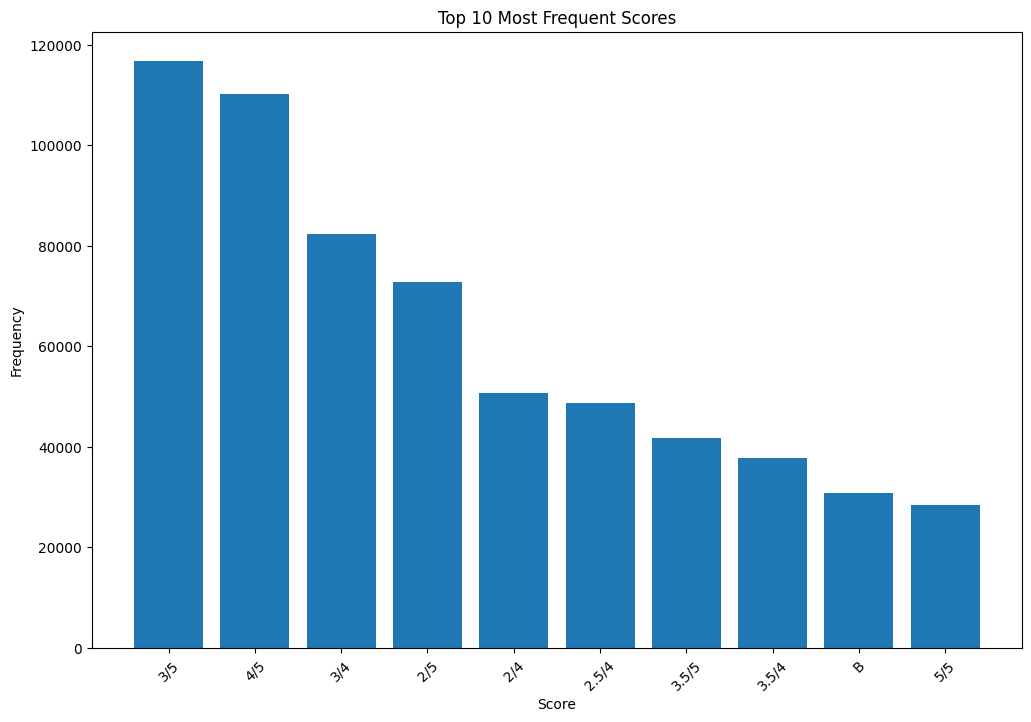

In [57]:
# Create bar chart of originalScore
# Assuming you have the dataset loaded in a DataFrame called 'data2'

# Calculate the top 10 most frequent score categories
top_scores = df_reviews['originalScore'].value_counts().nlargest(10)

# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_scores.index, top_scores.values)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Scores')
plt.xticks(rotation=45)
plt.show()

The bar chart represents the distribution of scores provided by critics for the movies in the dataset. The x-axis represents different score categories, while the y-axis represents the frequency or count of movies corresponding to each score category.

The chart shows that the majority of scores fall into three main categories. The category "Unknown" has the highest count, with approximately 500,000 movies receiving this score. This indicates that a significant number of movies do not have a specified score provided by the critics.

The next two most frequent score categories are "3/5" and "4/5", with each having around 100,000 movies assigned to them. These scores indicate moderately positive ratings for the movies.

The remaining score categories have counts below 50,000, suggesting that they are less common. These scores represent a variety of rating scales, such as specific numeric scores, letter grades, or other rating systems.

Overall, the bar chart provides an overview of the score distribution, highlighting the prevalence of "Unknown" scores and indicating that moderately positive ratings (3/5 and 4/5) are relatively common among the movies in the dataset.

In [58]:
# Calculate correlation matrix
corr_matrix = df_movies.corr()

# Print the correlation matrix
print(corr_matrix)

                audienceScore  tomatoMeter  runtimeMinutes  boxOffice  \
audienceScore        1.000000     0.602345        0.160563   0.076131   
tomatoMeter          0.602345     1.000000        0.005100  -0.045084   
runtimeMinutes       0.160563     0.005100        1.000000   0.089889   
boxOffice            0.076131    -0.045084        0.089889   1.000000   
log_boxOffice        0.137859    -0.166543        0.147937   0.456990   

                log_boxOffice  
audienceScore        0.137859  
tomatoMeter         -0.166543  
runtimeMinutes       0.147937  
boxOffice            0.456990  
log_boxOffice        1.000000  


<ipython-input-58-ab24a835cdb5>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



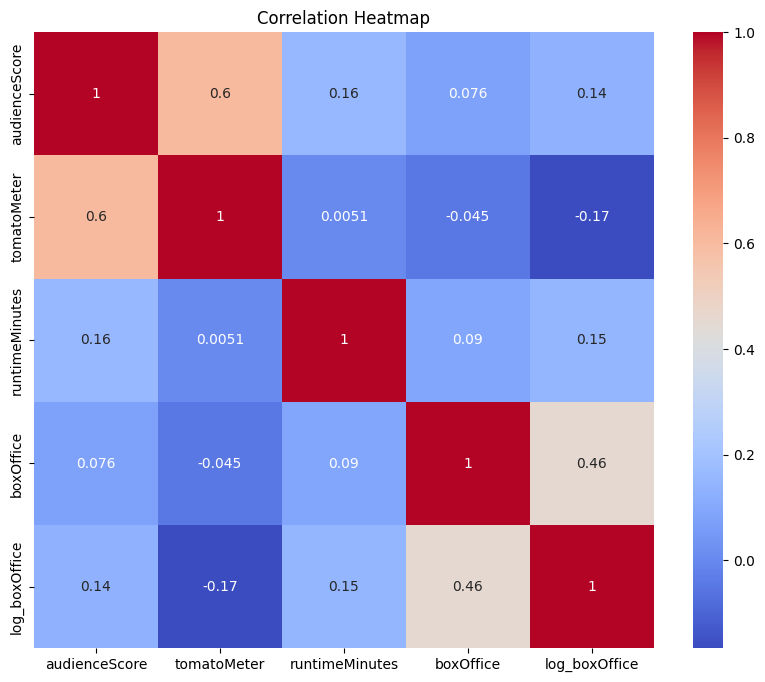

In [59]:
# Draw the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

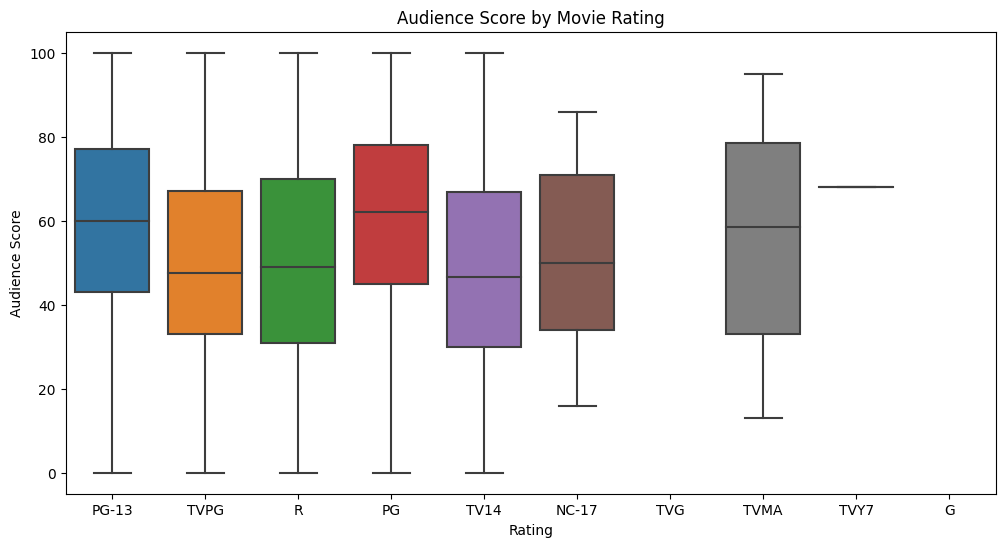

In [60]:
plt.figure(figsize=(12,6))
sns.boxplot(x='rating', y='audienceScore', data=df_movies)
plt.title('Audience Score by Movie Rating')
plt.xlabel('Rating')
plt.ylabel('Audience Score')
plt.show()

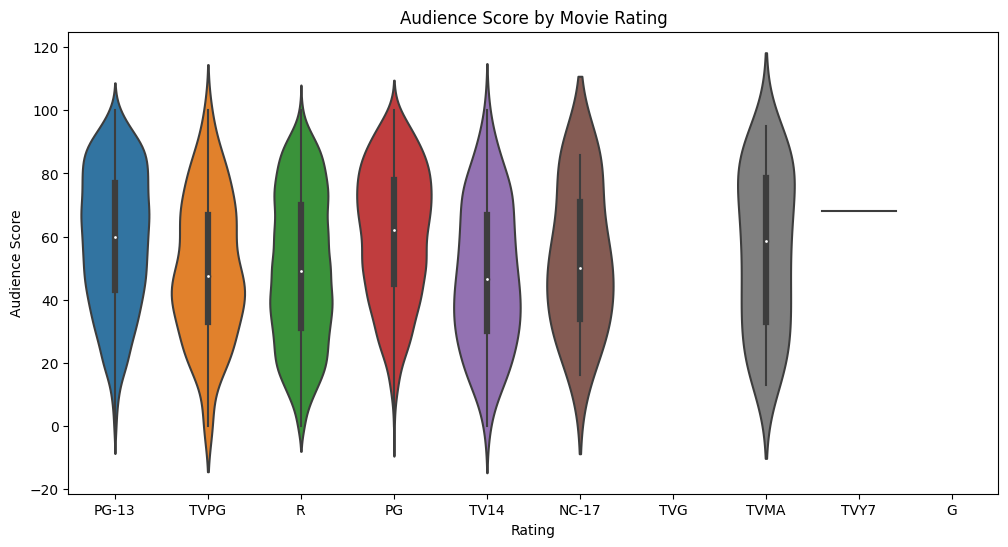

In [61]:
plt.figure(figsize=(12,6))
sns.violinplot(x='rating', y='audienceScore', data=df_movies)
plt.title('Audience Score by Movie Rating')
plt.xlabel('Rating')
plt.ylabel('Audience Score')
plt.show()

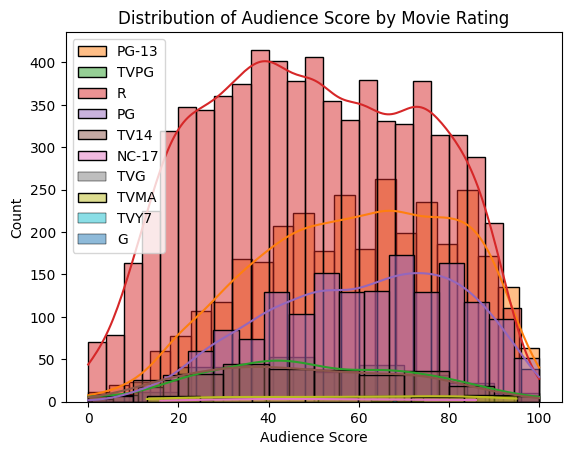

In [62]:
# Plotting separate histograms for each movie rating
for rating in df_movies['rating'].unique():
    sns.histplot(df_movies[df_movies['rating'] == rating]['audienceScore'], kde=True, label=rating)
plt.title('Distribution of Audience Score by Movie Rating')
plt.xlabel('Audience Score')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

81.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

91.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

66.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

83.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categor

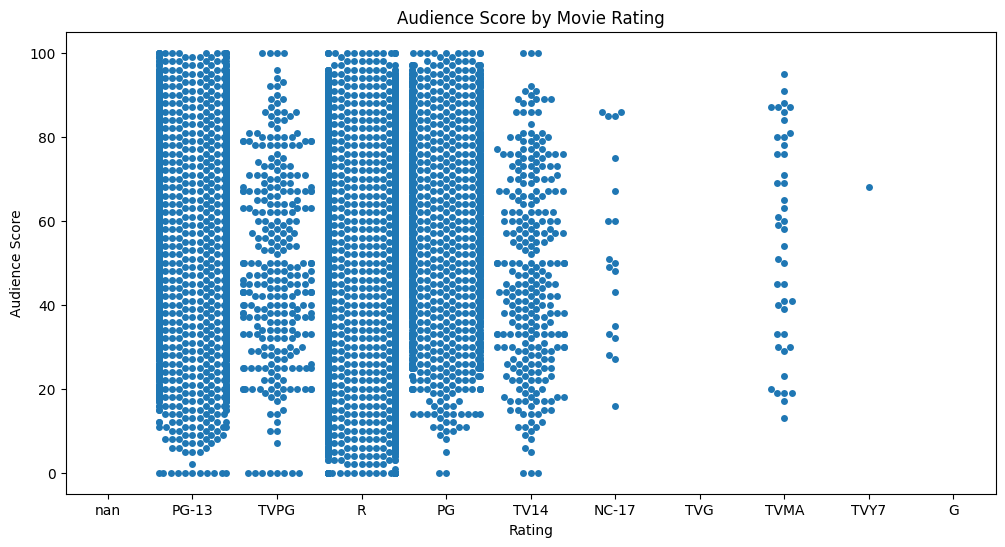

In [63]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='rating', y='audienceScore', data=df_movies)
plt.title('Audience Score by Movie Rating')
plt.xlabel('Rating')
plt.ylabel('Audience Score')
plt.show()

In [64]:
from scipy.stats import f_oneway

# Create a group for each rating category
groups = [group['audienceScore'].dropna() for name, group in df_movies.groupby('rating')]

# Perform one-way ANOVA
f_val, p_val = f_oneway(*groups)

# Print the F-value and p-value
print('F-value:', f_val)
print('p-value:', p_val)

F-value: nan
p-value: nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning:

at least one input has length 0



In [65]:
# Create a group for each rating category
groups = [group['runtimeMinutes'].dropna() for name, group in df_movies.groupby('rating')]

# Perform one-way ANOVA
f_val, p_val = f_oneway(*groups)

# Print the F-value and p-value
print('F-value:', f_val)
print('p-value:', p_val)

F-value: 43.02088043590026
p-value: 9.493789416311905e-77


#Combine movies_df and reviews_df

In [66]:
df_merged = df_reviews.merge(df_movies, how='inner', on=['id'])
df_merged = df_merged[['id', 'title', 'reviewText', 'reviewState', 'scoreSentiment']]
df_merged.head()

,id,title,reviewText,reviewState,scoreSentiment
0,beavers,Beavers,Timed to be just long enough for most youngste...,fresh,POSITIVE
1,blood_mask,Blood Mask,It doesn't matter if a movie costs 300 million...,rotten,NEGATIVE
2,city_hunter_shinjuku_private_eyes,City Hunter: Shinjuku Private Eyes,The choreography is so precise and lifelike at...,fresh,POSITIVE
3,city_hunter_shinjuku_private_eyes,City Hunter: Shinjuku Private Eyes,The film's out-of-touch attempts at humor may ...,rotten,NEGATIVE
4,dangerous_men_2015,Dangerous Men,Its clumsy determination is endearing and some...,fresh,POSITIVE


#Data Cleaning and Per-processing

In [67]:
df_merged.isnull().sum()

id                    0
title              5470
reviewText        70284
reviewState           0
scoreSentiment        0
dtype: int64

###  Drop rows that have less than 80% non-null values

###   Impute Missing Values for numeric data using mean

In [79]:
df_merged = df_merged.dropna(subset=['reviewText'])
df_merged['title'].fillna('Unknown', inplace=True)

In [80]:
df_merged.isnull().sum()

id                0
title             0
reviewText        0
reviewState       0
scoreSentiment    0
dtype: int64

###  Checking and Dropping the duplicate rows

In [81]:
df_merged.duplicated().sum()

35959

In [82]:
df_merged.drop_duplicates(inplace=True)

In [83]:
df_merged.duplicated().sum()

0

[Text(0, 0, '914156'), Text(0, 0, '449144')]

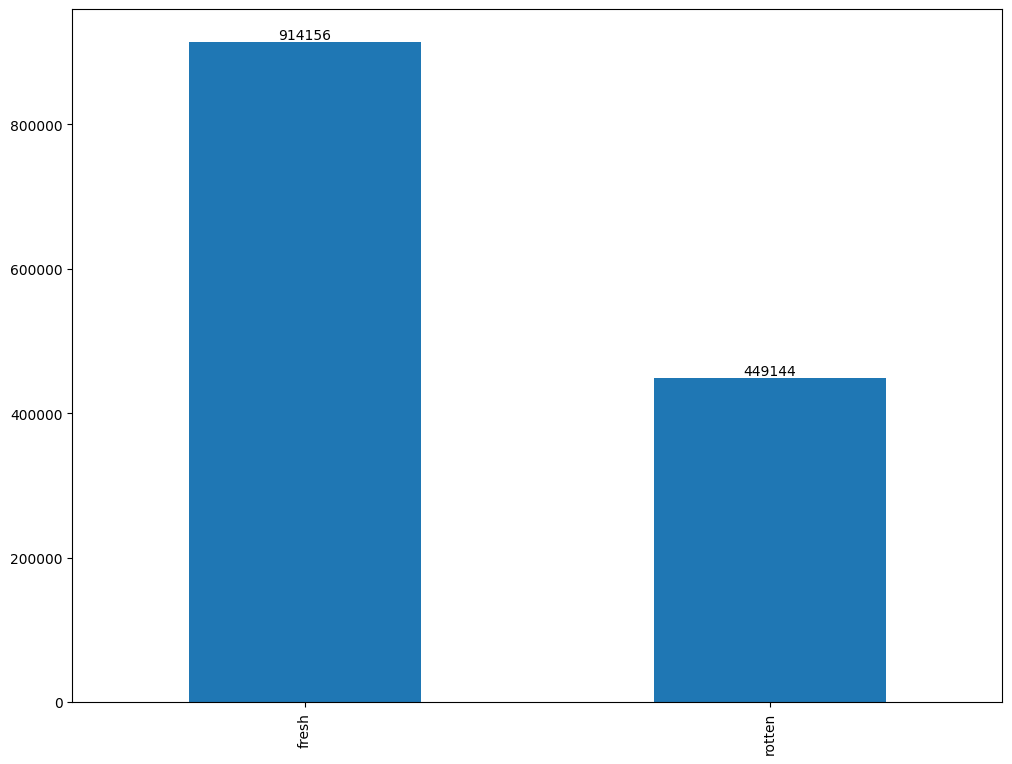

In [84]:
# Plot distribution of the review
ax = df_merged.reviewState.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

In [85]:
df_sub = df_merged

# Encode the label
reviewState = pd.DataFrame(df_sub.reviewState.replace(['Rotten','Fresh'],[0,1]))

# Build final DataFrame
df_feature_critics = pd.concat([df_sub[['reviewText']]
                        ,reviewState], axis=1).dropna()
df_feature_critics.head()

,reviewText,reviewState
0,Timed to be just long enough for most youngste...,fresh
1,It doesn't matter if a movie costs 300 million...,rotten
2,The choreography is so precise and lifelike at...,fresh
3,The film's out-of-touch attempts at humor may ...,rotten
4,Its clumsy determination is endearing and some...,fresh


In [86]:
X_train, X_test, y_train, y_test = train_test_split( df_feature_critics['reviewText'], df_feature_critics['reviewState'], test_size=0.2, random_state=42)

In [ ]:
# Instantiate vectorizer class
vectorizer = CountVectorizer(min_df=1)

# Transform our text data into vector
X_train_vec = vectorizer.fit_transform(X_train).toarray()

# Initialize random forest and train it
rf_weighted = RandomForestClassifier(random_state=2, class_weight=class_weight_dict)
rf_weighted.fit(X_train_vec, y_train)

# Predict and output classification report
y_predicted = rf_weighted.predict(vectorizer.transform(X_test).toarray())

print(classification_report(y_test, y_predicted))

fig, ax = plt.subplots(figsize=(12, 9))
plot_confusion_matrix(rf_weighted, vectorizer.transform(X_test).toarray(), y_test, cmap ='cividis', ax=ax)